In [1]:
from scipy.optimize import root_scalar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
cm = 1/2.54  
width = 12*cm 

In [ ]:
# physical functions
def Ak(k,Gam,sgam):
    return Gam*(Gam+sgam-k)/k**2/2

def AOK(k,Gam,sgam):
    return Gam*(Gam+sgam-k)
def ymaxx(w,k,G,gamma):
    return (2+np.sqrt(1-3/2/w**2*AOK(k,G,gamma)))/3
# def bk(k,Gam,sgam):
#     return 2*AOK(k,Gam,sgam)/(-1-np.sqrt(1+8*Ak(k,Gam,sgam)*(1+sgam/Gam)))
def B_org(w,k,Gam):
    return k*Gam/2/w**2

def maxFk(k,w,Gam,sgam):
    return -B_org(k,Gam,sgam)+2*ymaxx(w,k,Gam,sgam)**3-2*ymaxx(w,k,Gam,sgam)**2

def F_der(y,w,k,Gam,sgam):
    return -(AOK(k,Gam,sgam)/w**2/2+1)-3*y**2+4*y
# def rootFw(w,k,Gam,sgam):
#     return bk(k,Gam,sgam)/w**2-2*ymaxx(w,k,Gam,sgam)**3+2*ymaxx(w,k,Gam,sgam)**2
def minF(w,k,G,gamma):
    if w>0 and k>0:
        return (2-np.sqrt(1-3/2/w**2*AOK(k,G,gamma)))/3*w/k
    else:
        if w==0:
            return 0#(2-np.sqrt(1-3/2*10**8*AOK(k,G,gamma)))/3
        else:
            return (2-np.sqrt(1-3/2/w**2*AOK(k,G,gamma)))/3*w*10**5
def maxF(w,k,G,gamma):
    if w>0 and k>0:
        return (2+np.sqrt(1-3/2/w**2*AOK(k,G,gamma)))/3*w/k
    else:
        if w==0:
            return 0#(2-np.sqrt(1-3/2*10**8*AOK(k,G,gamma)))/3
        else:
            return (2+np.sqrt(1-3/2/w**2*AOK(k,G,gamma)))/3*w*10**5

def Func(y,w,k,Gam,sgam):
    return -B_org(k,Gam,sgam)-(1/2/w**2*AOK(k,Gam,sgam)+1)*y-y**3+2*y**2

def Foriginal(y,w,k,Gamma,gamma):
    return -w*Gamma/2-Gamma/2*(Gamma+gamma-k)*y-k**2*y**3+2*w*k*y**2-w**2*y

def BigF(y,W,K):
    return -BK(W,K)-(1+(1-K)/2/W**2)*y-y**3+2*y**2

# def lamtest(y,w,k,Gam,sgam):
#     A = AOK(k,Gam,sgam)
#     p = Gam**2/w**2+A/w**2/2+3*y**2-4*y+1
#     q = Gam**2/w**2*(A/w**2/2+3*y**2-4*y+1)+Gam**2/k**2*(2*y-k/w)*(y-k/w)
#     return p, p**2-4*q
    # return (-p+np.sqrt(p**2-4*q))/2, p,p**2-4*q

def lamtest(y,w,k,Gam,sgam):
    A = AOK(k,Gam,sgam)
    p = Gam**2+A/2+3*k**2*y**2-4*y*w*k+w**2
    q = Gam**2*(A/2+3*k**2*y**2-4*y*w*k+w**2)+Gam**2*(2*y*k-w)*(y*k-w)
    return p, p**2-4*q

def lam2(y,w,k,Gam,sgam):
    A = AOK(k,Gam,sgam)
    p = Gam**2/w**2+A/w**2/2+3*y**2-4*y+1
    q = Gam**2/w**2*(A/w**2/2+3*y**2-4*y+1)+Gam**2/k**2*(2*y-k/w)*(y-k/w)
    return (-p-np.sqrt(p**2-4*q))/2, p,p**2-4*q
def damping(w,k,Gamma,gamma):
    s2= np.sqrt(2)
    return -2/27-(2*gamma+k)/6*Gamma/w**2+2/27*(1-3*(2*Gamma**2+AOK(k,Gamma,gamma))/2/w**2)**(3/2)

def BK(W,K):
    return K/2/W**2

def yKnax(W,K):
    return (2+np.sqrt(1-3/2*(1-K)/W**2))/3
def yKnix(W,K):
    return (2-np.sqrt(1-3/2*(1-K)/W**2))/3
def FKK(W,K):
    return -BK(W,K)+yKnax(W,K)**3*2-2*yKnax(W,K)**2
def BigF(y,W,K):
    return -BK(W,K)-(1+(1-K)/2/W**2)*y-y**3+2*y**2
def m_z(y,kappa,omega,Gamma):
    return 1/2 -(kappa*y**2-omega*y)/Gamma
def max_mod(y,w,k,Gam,gamma):
    return (1/2-k/Gam*((y-w/k/2)**2-w**2/4/k**2))**2+y**2

In [79]:
#Plotting Class



class TickProperties():
    
    major_xtick_step = 5,
    minor_xtick_step = 1
    major_ytick_step = 5
    minor_ytick_step = 1
    STRIP_OF_ZEROS_X = False
    STRIP_OF_ZEROS_Y = False

    def __init__(self,\
    xtick_step_major = 5,\
    xtick_step_minor = 1,\
    ytick_step_major = 5,\
    ytick_step_minor = 1,\
    SZX = False,\
    SZY = False):
        self.major_xtick_step = xtick_step_major
        self.minor_xtick_step = xtick_step_minor
        self.major_ytick_step = ytick_step_major
        self.minor_ytick_step = ytick_step_minor
        self.STRIP_OF_ZEROS_X = SZX
        self.STRIP_OF_ZEROS_Y = SZY

class Format():
    numb_xticks = None
    numb_yticks = None
    custom_func_x = None
    custom_func_y = None
    x_scale = None
    y_scale = None
    x_precion = "{:.2f}"
    y_precion = "{:.2f}"
    def __init__(self,numb_xticks=None,numb_yticks=None,custom_funx=None,custom_funy=None,xscale=None,yscale=None,xprec="{:.2f}",yprec="{:.2f}"):
        self.numb_xticks =numb_xticks
        self.numb_yticks = numb_yticks
        self.custom_func_x = custom_funx
        self.custom_func_y = custom_funy
        self.x_precion=xprec
        self.y_precion = yprec
        self.x_scale = xscale
        self.y_scale = yscale
    def formatx0(self,x,pos):
        try:
                # print(x,pos)#,"{:.2f}".format(w[int(x)]))
            
            index = int((pos-1)*self.x_scale.shape[0]//self.numb_xticks)
            # print(index)
            # print()
            return self.x_precion.format(self.x_scale[index])
        except:
            return self.x_precion.format(self.x_scale[-1])
    def formatx1(self,x,pos):
        try:
                # print(x,pos)#,"{:.2f}".format(w[int(x)]))

            index = int((pos-1)*self.x_scale.shape[0]//self.numb_xticks)
            # print(index)
            # print()
            return self.x_precion.format(self.x_scale[index])
        except:
            return self.x_precion.format(self.x_scale[-1])
    
    def formaty1(self,x,pos):
        try:
                # print(x,pos)#,"{:.2f}".format(w[int(x)]))

            index = int((pos-1)*self.y_scale.shape[0]//self.numb_yticks)
            # print(index)
            # print()
            return self.y_precion.format(self.y_scale[index])
        except:
            return self.y_precion.format(self.y_scale[-1])
        
    def formaty(self,x,pos):
        try:
            return self.y_precion.format(self.y_scale[int(x)])
        except:
            return ""

class Setup_Fig():
    DEFAULT_HEAT_EXTEND = (-0.5,39.5,29.5,-0.5)
    xlim = None
    ylim = None
    tickprop = TickProperties()
    formatter = Format()
    cm = 1/2.54 
    fig_width = 12*cm
    fig_height = 4.8/6.4*12*cm
    name_of_plot = None
    def __init__(self,name_of_plot = "sign_of_ev1.pdf",xlim=None,ylim=None,tickp=TickProperties(),formater=Format()):
        self.xlim=xlim
        self.ylim = ylim   
        self.tickprop =tickp       
        self.formatter = formater
        self.name_of_plot = name_of_plot

    
    plt.rcParams["lines.markersize"]=0.7
    plt.rcParams["axes.unicode_minus"]=True
    plt.rcParams["font.size"]=10
    plt.rcParams["text.usetex"]=True
    plt.rcParams["font.serif"]="Computer Modern Serif"
# ax.scatter(A,root,color='0')
    



    def return_fig(self,shape=(1,1),dots_per_inch=400,xax_share=False,yax_share=False,joined=False):
        
        fig, ax = plt.subplots(*shape,figsize=(self.fig_width,self.fig_height),dpi=dots_per_inch,sharex=xax_share,sharey=yax_share)
        trash, xw, yw, trash=self.DEFAULT_HEAT_EXTEND# im.get_extent()
        self.formatter.numb_xticks = xw//self.tickprop.major_xtick_step+1
        self.formatter.numb_yticks = yw//self.tickprop.major_ytick_step+1
        
        for i in range(shape[0]):
            for j in range(shape[1]):
                pos= 'outer_left'
                if shape[0]==1:
                    if shape[1]==1:
                        current_ax = ax
                    else:
                        current_ax = ax[j]
                else:
                    if shape[1]==1:
                        current_ax = ax[i]
                    else:
                        current_ax = ax[i,j]
                        if j==0:
                           pos= 'outer_left'
                        elif j<shape[1]-1:
                            pos = 'middle'
                        elif j==shape[1]-1:
                            pos = 'outer_right'
                        


        # axlimits have to be adapted
                try:
                    current_ax.set_xlim(*self.xlim)
                except:
                    pass
                try:
                    current_ax.set_ylim(*self.ylim)
                except:
                    pass    
            

                if self.tickprop.STRIP_OF_ZEROS_X:
                    current_ax.xaxis.set_major_formatter(ticker.FuncFormatter(self.formatter.formatx0))
                current_ax.yaxis.set_major_locator(ticker.MultipleLocator(self.tickprop.major_ytick_step))
                current_ax.yaxis.set_minor_locator(ticker.MultipleLocator(self.tickprop.minor_ytick_step))
                current_ax.xaxis.set_major_locator(ticker.MultipleLocator(self.tickprop.major_xtick_step))
                current_ax.xaxis.set_minor_locator(ticker.MultipleLocator(self.tickprop.minor_xtick_step))

                if self.tickprop.STRIP_OF_ZEROS_Y:
                    current_ax.yaxis.set_major_formatter(ticker.FuncFormatter(self.formatter.formaty1))  

                if joined:
                    if i<shape[0]-1:
                        current_ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=False)
                    else:
                        current_ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
                        
                    if pos=='outer_left':
                        current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)
                    elif pos=='middle':
                        current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=False)
                    elif pos=='outer_right':
                        current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelright=True)
                        # current_ax.set_xlabel(r'$\Gamma \tilde{A}$')
                        # current_ax.set_ylabel(r'$\tilde{y}$',rotation=0)
                else:
                    current_ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
                    
                    current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)   


                current_ax.tick_params(axis='both',which='major',length=4.5)
                plt.setp(current_ax.yaxis.get_majorticklabels(),va='center')
        
        return fig, ax





In [ ]:
# boundary in W-K for the number of fixed points determination
K = np.linspace(1+1/10**4,20,100)
W = np.zeros_like(K)
for i in range(len(K)):
    # print(FKK(1/10**6,k[i]),FKK(10**5,k[i]))
    try:
        r = root_scalar(FKK,args=(K[i]),method='brentq',bracket=(1/10**7,10**6))
        W[i]=r.root
        # print(i,FKK(1/10**8,K[i]),FKK(10**7,K[i]))
    except:
        print(i,FKK(1/10**8,K[i]),FKK(10**7,K[i]))
    # print(FKK(w[i],k[i]+0.1))
    # break

Gam = 1
sgam = 0.2*Gam


# K = np.linspace(1,20,50)
# W = np.linspace(1,20,50)

# k = K*(Gam+sgam)
# w = W*np.sqrt(Gam*(Gam+sgam))

In [32]:
K = np.linspace(1,20,50)
W = np.linspace(1,20,50)
Gam = 2
sgam = 3

k = K*(Gam+sgam)
w = W*np.sqrt(Gam*(Gam+sgam))
print((Gam+sgam)/np.sqrt(Gam*(Gam+sgam))**2)


def BK(W,K):
    return K/2/W**2

def B_org(w,k,Gam):
    return k*Gam/2/w**2

for i in range(len(K)):
    for j in range(len(W)):
        k_val = k[i]
        w_val = w[j]
        K_val = K[i]
        W_val = W[j]
        print(B_org(w_val,k_val,Gam)/BK(W_val,K_val))

0.4999999999999999
0.9999999999999998
0.9999999999999998
1.0
0.9999999999999999
0.9999999999999997
1.0000000000000002
0.9999999999999999
0.9999999999999998
0.9999999999999997
1.0
1.0
0.9999999999999998
0.9999999999999998
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999998
0.9999999999999998
1.0
0.9999999999999997
0.9999999999999999
0.9999999999999998
0.9999999999999997
1.0
1.0
0.9999999999999998
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999997
0.9999999999999998
0.9999999999999998
0.9999999999999998
0.9999999999999998
0.9999999999999998
0.9999999999999999
0.9999999999999998
0.9999999999999999
1.0000000000000002
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
0.9999999999999998
0.9999999999999998
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999997
0.9999999999999998
1.0
0.9999999999999998
0.9999999999999998
0.9999999999999997
1.0
1.0
0.9999999999999999
0.9999999999999997
0.9999999999999997
1.0
0.99999999999999

In [128]:
# fixpoint determination
Gam = 1
sgam = 0.2*Gam

##
K= np.linspace(0,20)
W= np.linspace(0,5)
##

k = K*(Gam+sgam)
w = W*np.sqrt(Gam*(Gam+sgam))

root = np.zeros((w.shape[0],w.shape[0],3))
conv= np.zeros((w.shape[0],k.shape[0],3))
check = np.zeros((w.shape[0],k.shape[0],3))
lamda= np.zeros((w.shape[0],k.shape[0],3))#,k.shape[1]))
damp = np.zeros((w.shape[0],k.shape[0],3))#,k.shape[1]))

mp =-1
l=0
for l in range(1):#,w.shape[1]):
    for i in range(np.shape(k)[0]):
        for j in range(np.shape(w)[0]):
            
            k_val = k[i]
            w_val= w[j]
            if i<j:

                try:
                    r=root_scalar(Foriginal,args=(w_val,k_val,Gam,sgam),method='bisect',bracket=(-10**10,0))#,maxF(a,kw_val)))
                    conv[i,j,:]= r.converged
                    root[i,j,0]= r.root
                    root[i,j,1:] = np.nan
                    damp[i,j,:], lamda[i,j,:]= lamtest(r.root,w_val,k_val,Gam,sgam)
                    # damp[i,j] = damping(w_val,k_val,Gam,sgam)
                    
                    # print(r.root)
                except:
                    print('1sol',i,j) 
            elif i>j:               
            # print(Func(minF(w_val,k_val,Gam,sgam),w_val,k_val,Gam,sgam,mp),Func(ymaxx(w_val,k_val,Gam,sgam),w_val,k_val,Gam,sgam,mp))

            # print(Func(-20,a,kw_val,Gam,sgam,mp),Func(minF(a,kw_val),a,kw_val,Gam,sgam,mp))
                try:
                    r=root_scalar(Foriginal,args=(w_val,k_val,Gam,sgam),method='bisect',bracket=(-10**6,0))#,maxF(a,kw_val)))
                    conv[i,j,0]= r.converged
                    root[i,j,0]= r.root
                    damp[i,j,0], lamda[i,j,0]= lamtest(r.root,w_val,k_val,Gam,sgam)

                # except:
                #     print('3sol',i,j)
                    # r=root_scalar(Foriginal,args=(w_val,k_val,Gam,sgam),method='bisect',bracket=(minF(w_val,k_val,Gam,sgam),maxF(w_val,k_val,Gam,sgam)))#,maxF(a,kw_val)))
                    # conv[i,j,1]= r.converged
                    # root[i,j,1]= r.root
                    # damp[i,j,1], lamda[i,j,1]= lamtest(r.root,w_val,k_val,Gam,sgam)


                    # r=root_scalar(Foriginal,args=(w_val,k_val,Gam,sgam),method='bisect',bracket=(maxF(w_val,k_val,Gam,sgam),10**6))#,maxF(a,kw_val)))
                    # conv[i,j,2]= r.converged
                    # root[i,j,2]= r.root
                    # damp[i,j,2], lamda[i,j,2]= lamtest(r.root,w_val,k_val,Gam,sgam)

                    # damp[i,j] = damping(w_val,k_val,Gam,sgam)
                    
                    # print(r.root)
                except:
                    # k_val = K[i]
                    # w_val = W[j]
                    print(Foriginal(minF(w_val,k_val,Gam,sgam),w_val,k_val,Gam,sgam),Foriginal(maxF(w_val,k_val,Gam,sgam),w_val,k_val,Gam,sgam),'3sol',i,j)
                    # print(Func(yKnix(W[j],K[i]),w_val,k_val,Gam,sgam),Func(yKnax(W[j],K[i]),w_val,k_val,Gam,sgam),'3sol',i,j)
                    # print(BigF(yKnix(W[j],K[i]),W[j],K[i]),BigF(yKnax(W[j],K[i]),W[j],K[i]),'3sol',i,j)
            

            else:
                try:
                    r=root_scalar(Foriginal,args=(w_val,k_val,Gam,sgam),method='bisect',bracket=(-10**3,0))#,maxF(a,kw_val)))
                    conv[i,j,0]= r.converged
                    root[i,j,0]= r.root
                    damp[i,j,0], lamda[i,j,0]= lamtest(r.root,w_val,k_val,Gam,sgam)
                    # damp[i,j] = damping(w_val,k_val,Gam,sgam)
                    # root[i,j,1]= maxF(w_val,k_val,Gam,sgam)
                    # damp[i,j,1], lamda[i,j,2]= lamtest(root[i,j,1],w_val,k_val,Gam,sgam)
                    # print(r.root)
                    # root[i,j,2] = np.nan
                except:
                    print('2sol',i,j) 

                
        


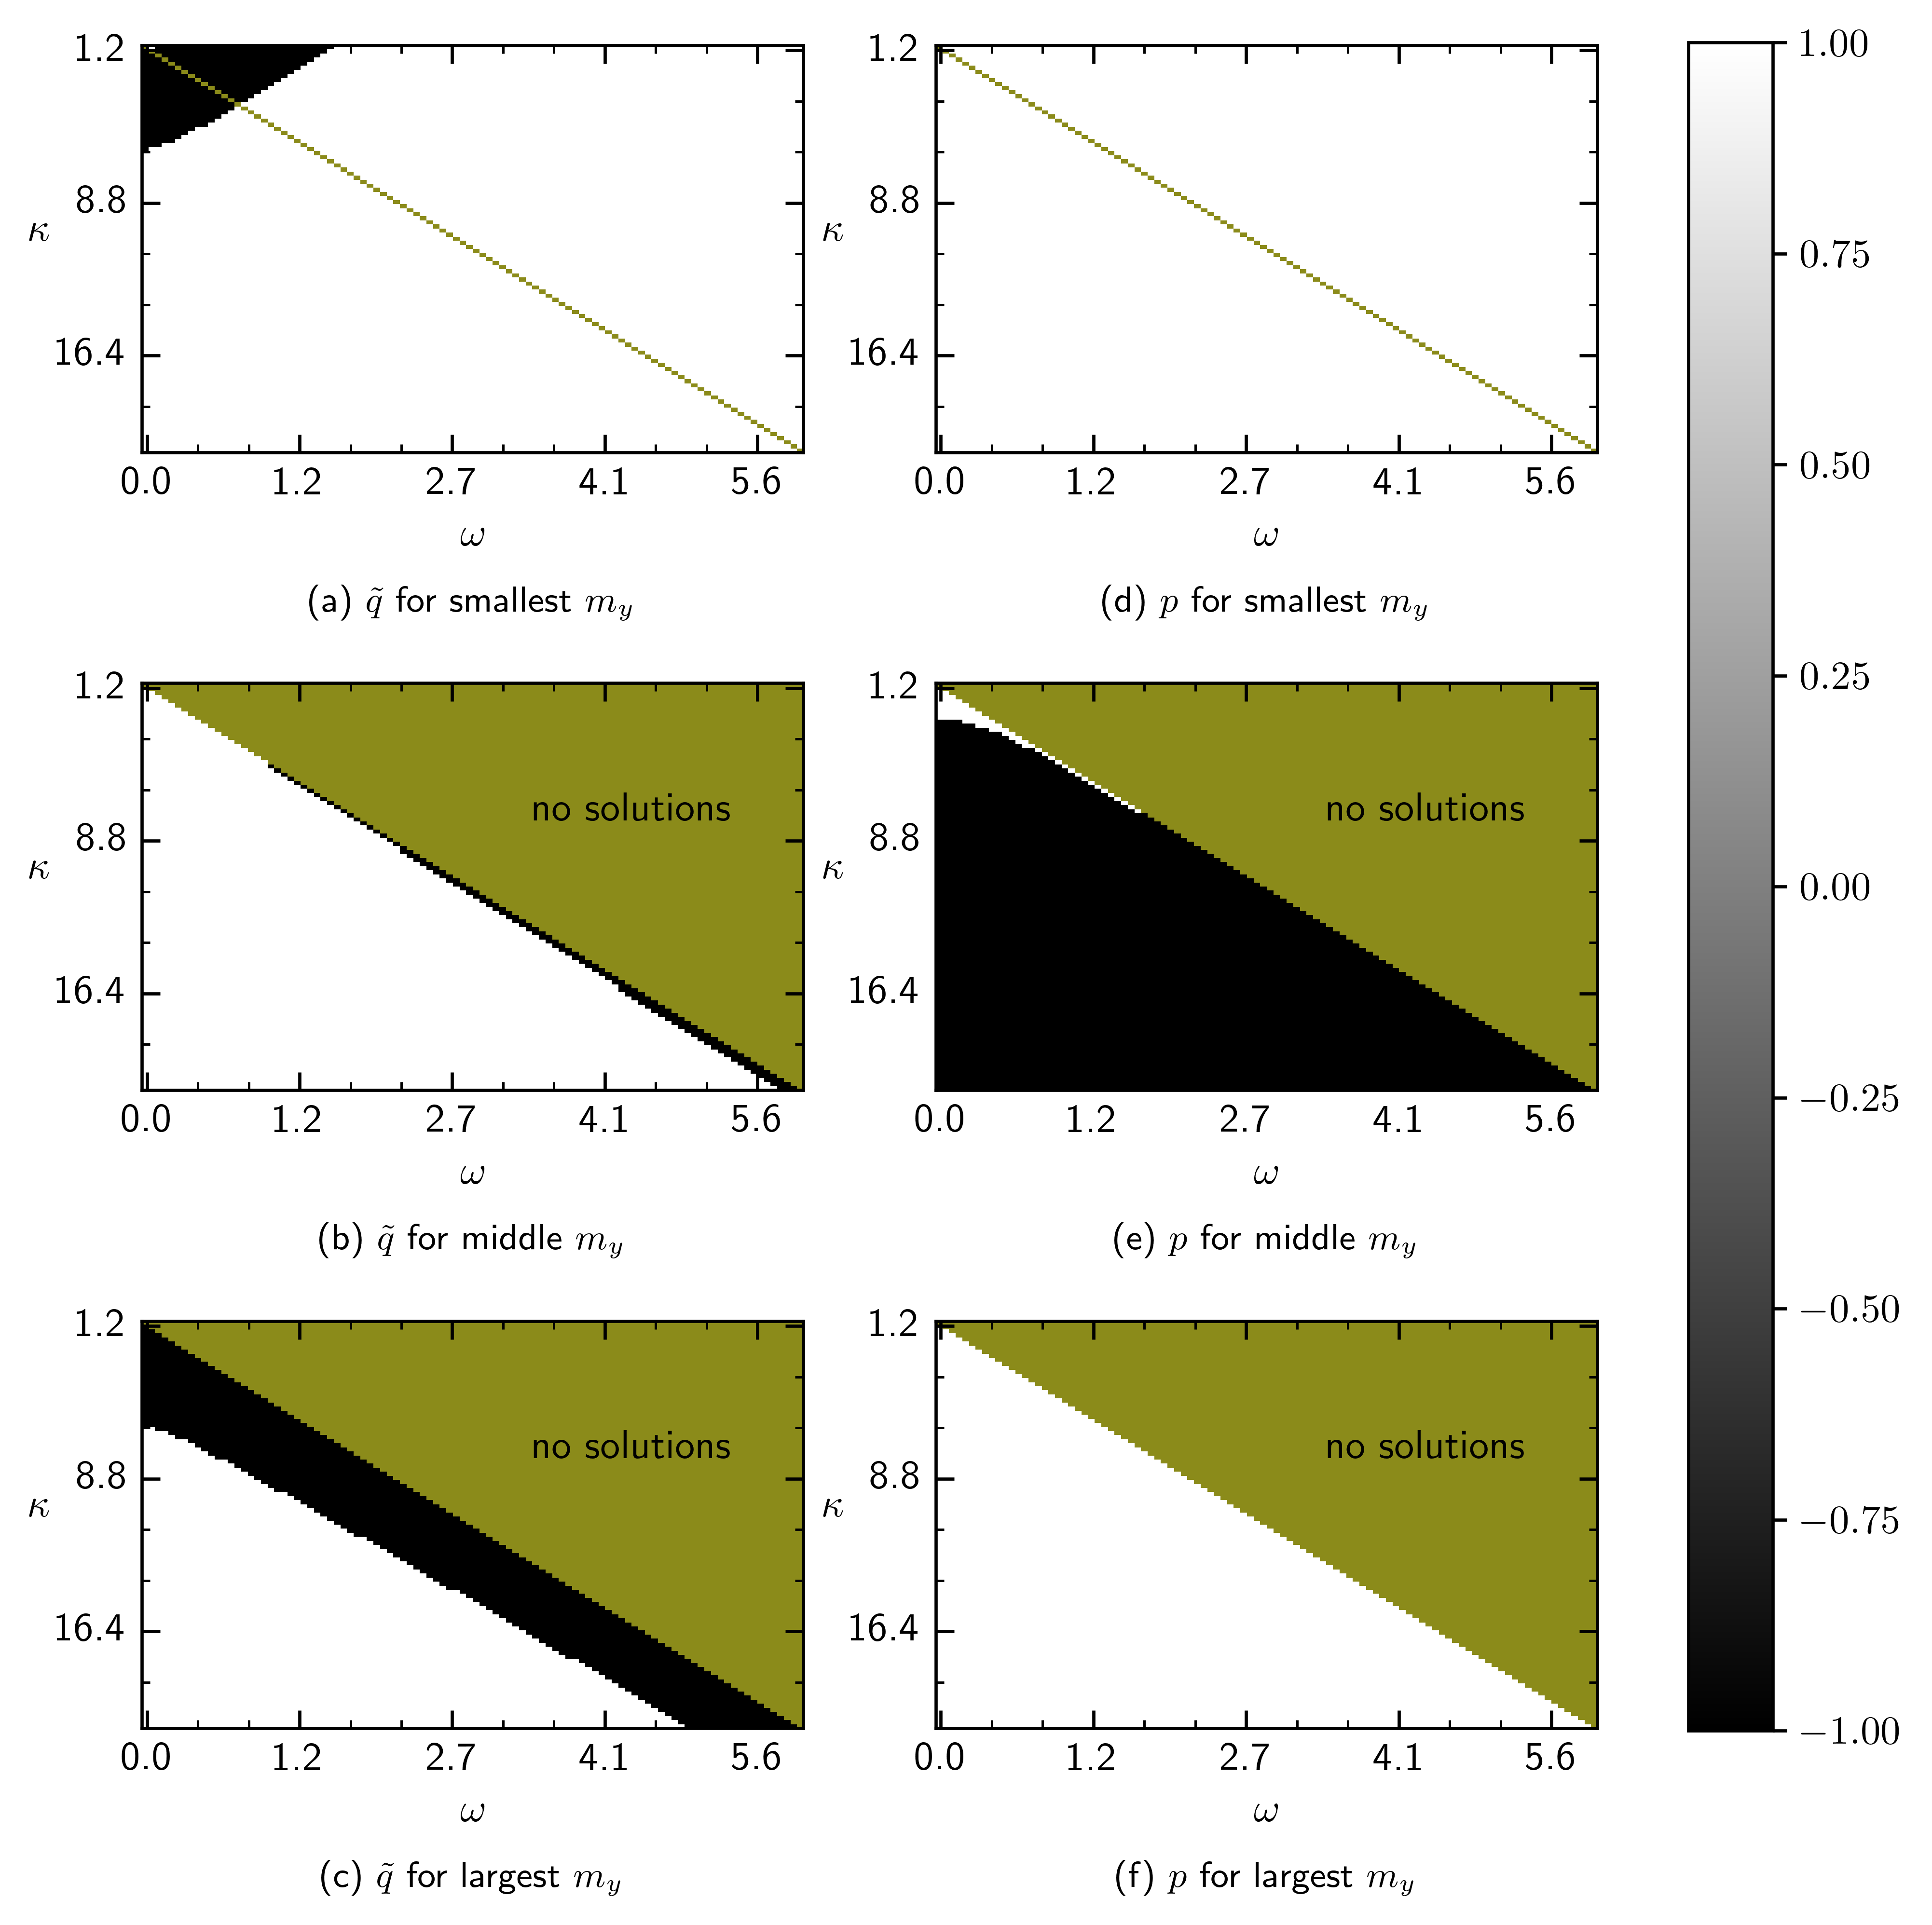

In [37]:
# lamda23 analysis
from matplotlib.colors import LinearSegmentedColormap

p = np.zeros_like(root)
old_roots = np.load('roots_K>1.npy')
sqrt_interior = np.zeros_like(root)
lamda = np.zeros_like(root)
border = np.zeros_like(root)
for s in range(3):
    for i in range(np.shape(k)[0]):
        for j in range(np.shape(w)[0]):
            if s==0 and i!=j:
                border[i,j,s]=np.nan
            elif s>0 and i>j:
                border[i,j,s]=np.nan
            if s==1 and i==j:
                p[i,j,s], sqrt_interior[i,j,s] = lamtest(root[i,j,0],w[j],k[i],Gam,sgam)
            elif s>0 and i<j:
                p[i,j,s], sqrt_interior[i,j,s] =1,1

            else:
                p[i,j,s], sqrt_interior[i,j,s] = lamtest(root[i,j,s],w[j],k[i],Gam,sgam)
            if sqrt_interior[i,j,s]>=0:
                lamda[i,j,s]=(-p[i,j,s]+np.sqrt(sqrt_interior[i,j,s]))/2
            else:
                lamda[i,j,s]=np.nan

tickformat = Format(xscale=w,yscale=k,xprec="{:.1f}",yprec="{:.1f}")
tickp = TickProperties(SZX=True,SZY=True,\
                       xtick_step_major=15,\
                        xtick_step_minor=5,\
                            ytick_step_major=15,\
                                ytick_step_minor=5)
setup = Setup_Fig(name_of_plot='lam2_anal.png',tickp=tickp,formater=tickformat)
setup.fig_width= 20.6*cm
setup.fig_height=20.6*cm #29.1*cm
setup.DEFAULT_HEAT_EXTEND = (-0.5,64.5,39.5,-0.5)
fig, ax = setup.return_fig(shape=(3,2),dots_per_inch=600)
plotstruct = [[sqrt_interior[:,:,0],sqrt_interior[:,:,1],sqrt_interior[:,:,2]],[p[:,:,0],p[:,:,1],p[:,:,2]]]
title = [[r'(a) $\tilde{q}$ for smallest $m_y$',r'(b) $\tilde{q}$ for middle $m_y$',r'(c) $\tilde{q}$ for largest $m_y$'],[r'(d) $p$ for smallest $m_y$',r'(e) $p$ for middle $m_y$',r'(f) $p$ for largest $m_y$']]
images = []
cdict1 = {
    'blue': (
        (0.0, 0.0, 0.0),
        (0.5, 0.0, 0.1),
        (1.0, 1.0, 1.0),
    ),
    'red': (
        (0.0, 0.0, 1.0),
        (1.0, 0.1, 0.0),
    ),
    'green': (
        (0.0, 0.0, 1.0),
        (1.0, 0.1, 0.0),
       
    )
}
colormap = LinearSegmentedColormap('red',cdict1)
for i in range(3):
    for j in range(2):
        im = ax[i,j].imshow(np.sign(plotstruct[j][i]),cmap='gray',vmin=-1,vmax=1,extent=(-0.5,64.5,39.5,-0.5))
        borderline = ax[i,j].imshow(border[:,:,i],cmap=colormap,vmin=-1,vmax=1,extent=(-0.5,64.5,39.5,-0.5))
        ax[i,j].set_title(title[j][i],loc='center',y=-0.45,fontsize=9)
        ax[i,j].set_xlabel(r'$\omega$')
        ax[i,j].set_ylabel(r'$\kappa$',rotation=0)
        if i>0:
            ax[i,j].text(38,13,r'no solutions')
        # ax[i,j].plot(w,k)
        # im.set_extend(((-0.5,39.5,39.5,-0.5)))
        images.append(im)
# cbar1 = fig.colorbar(images[3],ax=ax,orientation='vertical',fraction=0.05)
cbar2 = fig.colorbar(images[-2],ax=ax,orientation='vertical',shrink=0.934)
# fig.tight_layout()
# plt.figtext(s=r'\,\\Figure 5: The figures a-c present the sign of the interior of the square root for the eigenvalues $\lambda_{23}$ \\for the different fixed points and parameter configurations. Figures d-f show in the same manner \\the sign of $p$. In the entire setup is \\$\Gamma=1$ and $\gamma=0.2$ fixed.',x=0,y=0,fontsize=10,bbox=dict(xy=(0,0),width=5,height=5,boxstyle='Square'))
# plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/'+setup.name_of_plot,bbox_inches='tight')
plt.show()



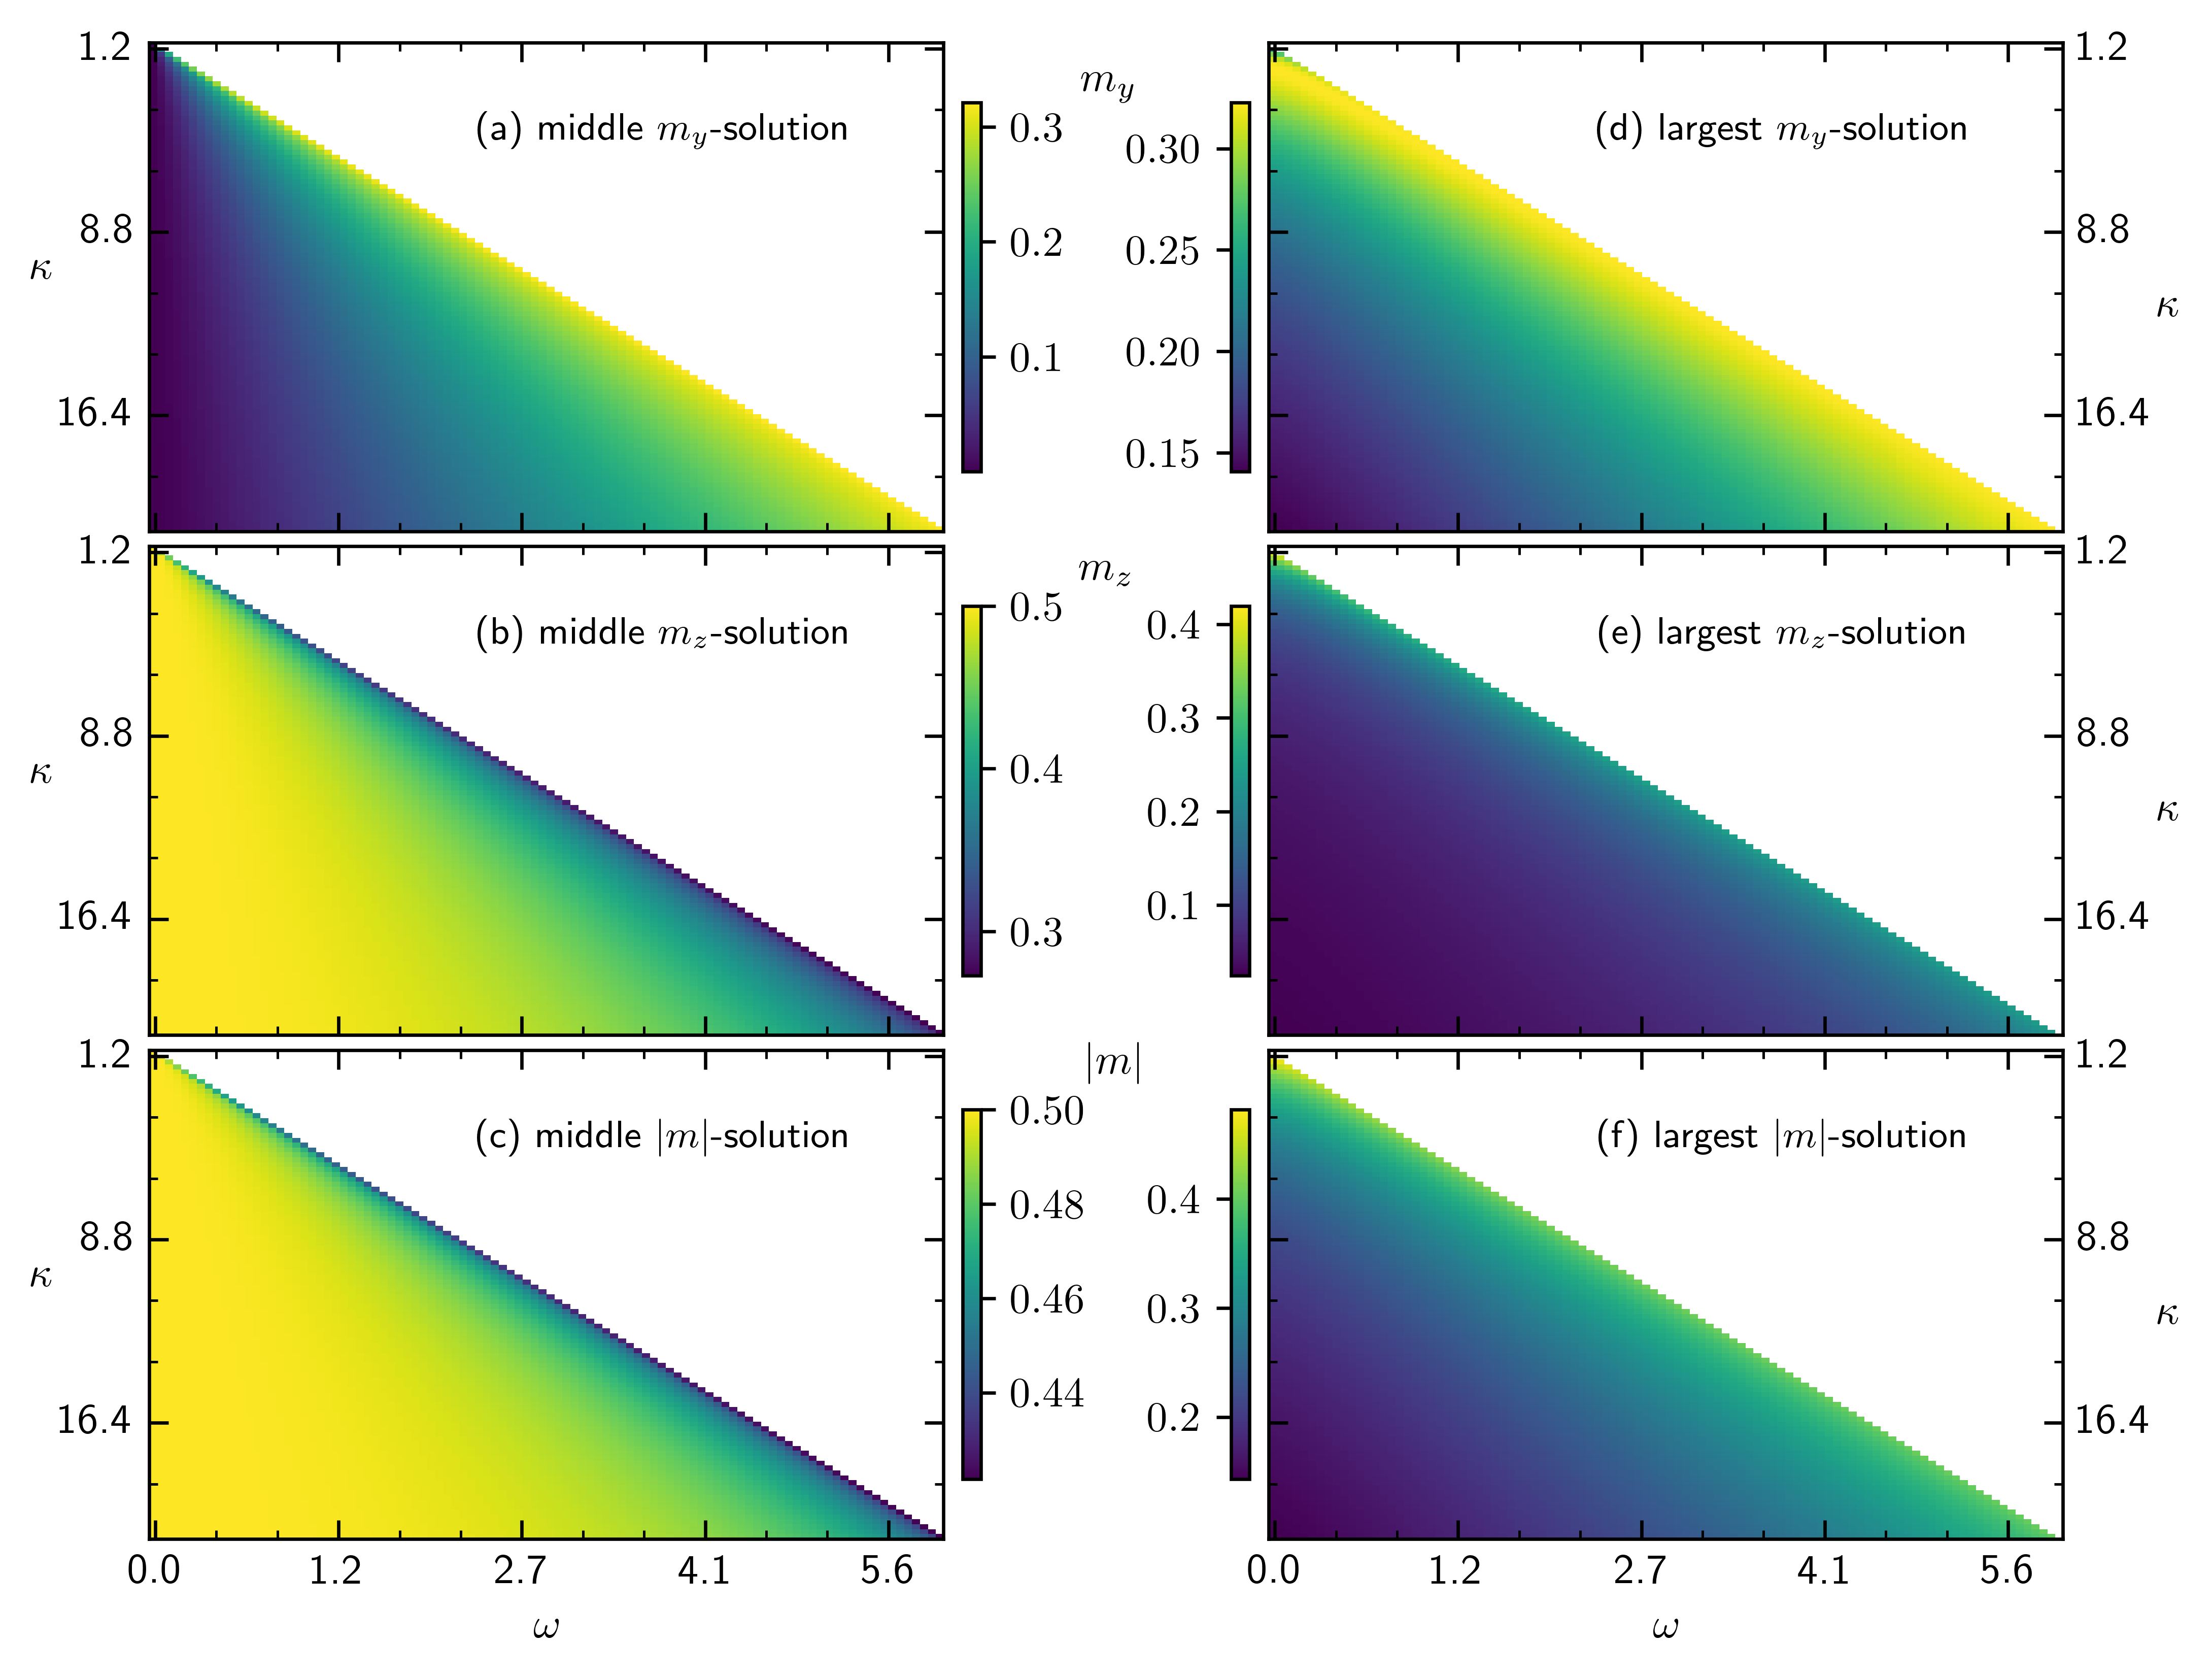

In [122]:
#heatmap fixp boundaries middle and large solution
from matplotlib.colors import LinearSegmentedColormap
p = np.zeros_like(root)
sqrt_interior = np.zeros_like(root)
lamda = np.zeros_like(root)
border = np.zeros_like(root)
shift = 0
zsol_sol = np.zeros_like(root)
for s in range(3):
    for i in range(np.shape(k)[0]):
        for j in range(np.shape(w)[0]):
            # if i!=j:
            #     border[i,j,s]=np.nan
            # if s==1 and i==j:
            #     p[i,j,s], sqrt_interior[i,j,s] = lamtest(root[i,j,0],w[j],k[i],Gam,sgam)
            # else:
            #     p[i,j,s], sqrt_interior[i,j,s] = lamtest(root[i,j,s],w[j],k[i],Gam,sgam)
            # if sqrt_interior[i,j,s]>=0:
            #     lamda[i,j,s]=(-p[i,j,s]+np.sqrt(sqrt_interior[i,j,s]))/2
            # else:
            #     lamda[i,j,s]=np.nan
            zsol_sol[i,j,s] = m_z(root[i,j,s],k[i],w[j],Gam) #*w[j]/k[i]

tickformat = Format(xscale=w[shift:],yscale=k,xprec="{:.1f}",yprec="{:.1f}")
tickp = TickProperties(SZX=True,SZY=True,\
                       xtick_step_major=15,\
                        xtick_step_minor=5,\
                            ytick_step_major=15,\
                                ytick_step_minor=5)
setup = Setup_Fig(name_of_plot='fixp_bound_heatmap_ml.png',tickp=tickp,formater=tickformat)
setup.fig_width= 20.6*cm
setup.fig_height=29.1*cm
setup.DEFAULT_HEAT_EXTEND = (-0.5,64.5,39.5,-0.5)
fig, ax = setup.return_fig(shape=(3,2),dots_per_inch=600,xax_share='col',yax_share='all',joined=True)
# plotstruct = [[sqrt_interior[:,:,0],sqrt_interior[:,:,1],sqrt_interior[:,:,2]],[p[:,:,0],p[:,:,1],p[:,:,2]]]

# title = [[r'(a) $\tilde{q}$ for smallest $m_y$',r'(b) $\tilde{q}$ for middle $m_y$',r'(c) $\tilde{q}$ for largest $m_y$'],[r'(d) $p$ for smallest $m_y$',r'(e) $p$ for middle $m_y$',r'(f) $p$ for largest $m_y$']]
images = []
cdict1 = {
    'blue': (
        (0.0, 0.0, 0.0),
        (0.5, 0.0, 0.1),
        (1.0, 1.0, 1.0),
    ),
    'red': (
        (0.0, 0.0, 1.0),
        (1.0, 0.1, 0.0),
    ),
    'green': (
        (0.0, 0.0, 1.0),
        (1.0, 0.1, 0.0),
       
    )
}
title = [[r'(a) middle $m_y$-solution',r'(b) middle $m_z$-solution',r'(c) middle $|m|$-solution'],[r'(d) largest $m_y$-solution',r'(e) largest $m_z$-solution',r'(f) largest $|m|$-solution']]
labelpos = ['left','right']
colormap = LinearSegmentedColormap('red',cdict1)
for i in range(2):
    # for j in range(2):
        im1 = ax[0,i].imshow(root[:,:,i+1],extent=(-0.5,64.5,39.5,-0.5))
        im2 = ax[1,i].imshow(zsol_sol[:,shift:,i+1],extent=(-0.5,64.5,39.5,-0.5))
        im3 = ax[2,i].imshow(np.sqrt(zsol_sol[:,shift:,i+1]**2+root[:,:,i+1]**2),extent=(-0.5,64.5,39.5,-0.5))

        # borderline = ax[i,j].imshow(border[:,:,0],cmap=colormap,vmin=-1,vmax=1,extent=(-0.5,64.5,39.5,-0.5))
        # ax[i].set_title(title[j][i],loc='center',y=-0.45,fontsize=9)
        ax[0,i].set_title(title[i][0],x=0.65,y=0.75,fontsize=9)
        ax[1,i].set_title(title[i][1],x=0.65,y=0.75,fontsize=9)
        ax[2,i].set_title(title[i][2],x=0.65,y=0.75,fontsize=9)
        # ax[0,i].set_xlabel(r'$\omega$')
        ax[0,i].set_ylabel(r'$\kappa$',rotation=0)
        ax[0,i].yaxis.set_label_position(labelpos[i])
        # ax[1,i].set_xlabel(r'$\omega$')
        ax[1,i].set_ylabel(r'$\kappa$',rotation=0)
        ax[1,i].yaxis.set_label_position(labelpos[i])
        ax[2,i].set_xlabel(r'$\omega$')
        ax[2,i].set_ylabel(r'$\kappa$',rotation=0)
        ax[2,i].yaxis.set_label_position(labelpos[i])
        # ax[i,j].plot(w,k)
        # im.set_extend(((-0.5,39.5,39.5,-0.5)))
        images.append(im)
# cbar1 = fig.colorbar(images[3],ax=ax,orientation='vertical',fraction=0.05)    
        shrink_fac = 0.22
        padi = 0.02
        cbar1 = fig.colorbar(im1,ax=ax[0,i],orientation='vertical',shrink=shrink_fac,location=labelpos[1-i],pad=padi)
        cbar2 = fig.colorbar(im2,ax=ax[1,i],orientation='vertical',shrink=shrink_fac,location=labelpos[1-i],pad=padi)
        cbar3 = fig.colorbar(im3,ax=ax[2,i],orientation='vertical',shrink=shrink_fac,location=labelpos[1-i],pad=padi)
        if i==1:
            cbar1.set_label(r'$m_y$',rotation=0,labelpad=-2,loc='top')#,shrink=0.934)
            cbar2.set_label(r'$m_z$',rotation=0,labelpad=10,x=5,y=1.05)
            cbar3.set_label(r'$|m|$',rotation=0,labelpad=7,x=5,y=1.07)
plt.subplots_adjust(hspace=-0.7,wspace=0)
# fig.tight_layout()
# plt.figtext(s=r'\,\\Figure 5: The figures a-c present the sign of the interior of the square root for the eigenvalues $\lambda_{23}$ \\for the different fixed points and parameter configurations. Figures d-f show in the same manner \\the sign of $p$. In the entire setup is \\$\Gamma=1$ and $\gamma=0.2$ fixed.',x=0,y=0,fontsize=10,bbox=dict(xy=(0,0),width=5,height=5,boxstyle='Square'))
# plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/'+setup.name_of_plot,bbox_inches='tight')
plt.show()



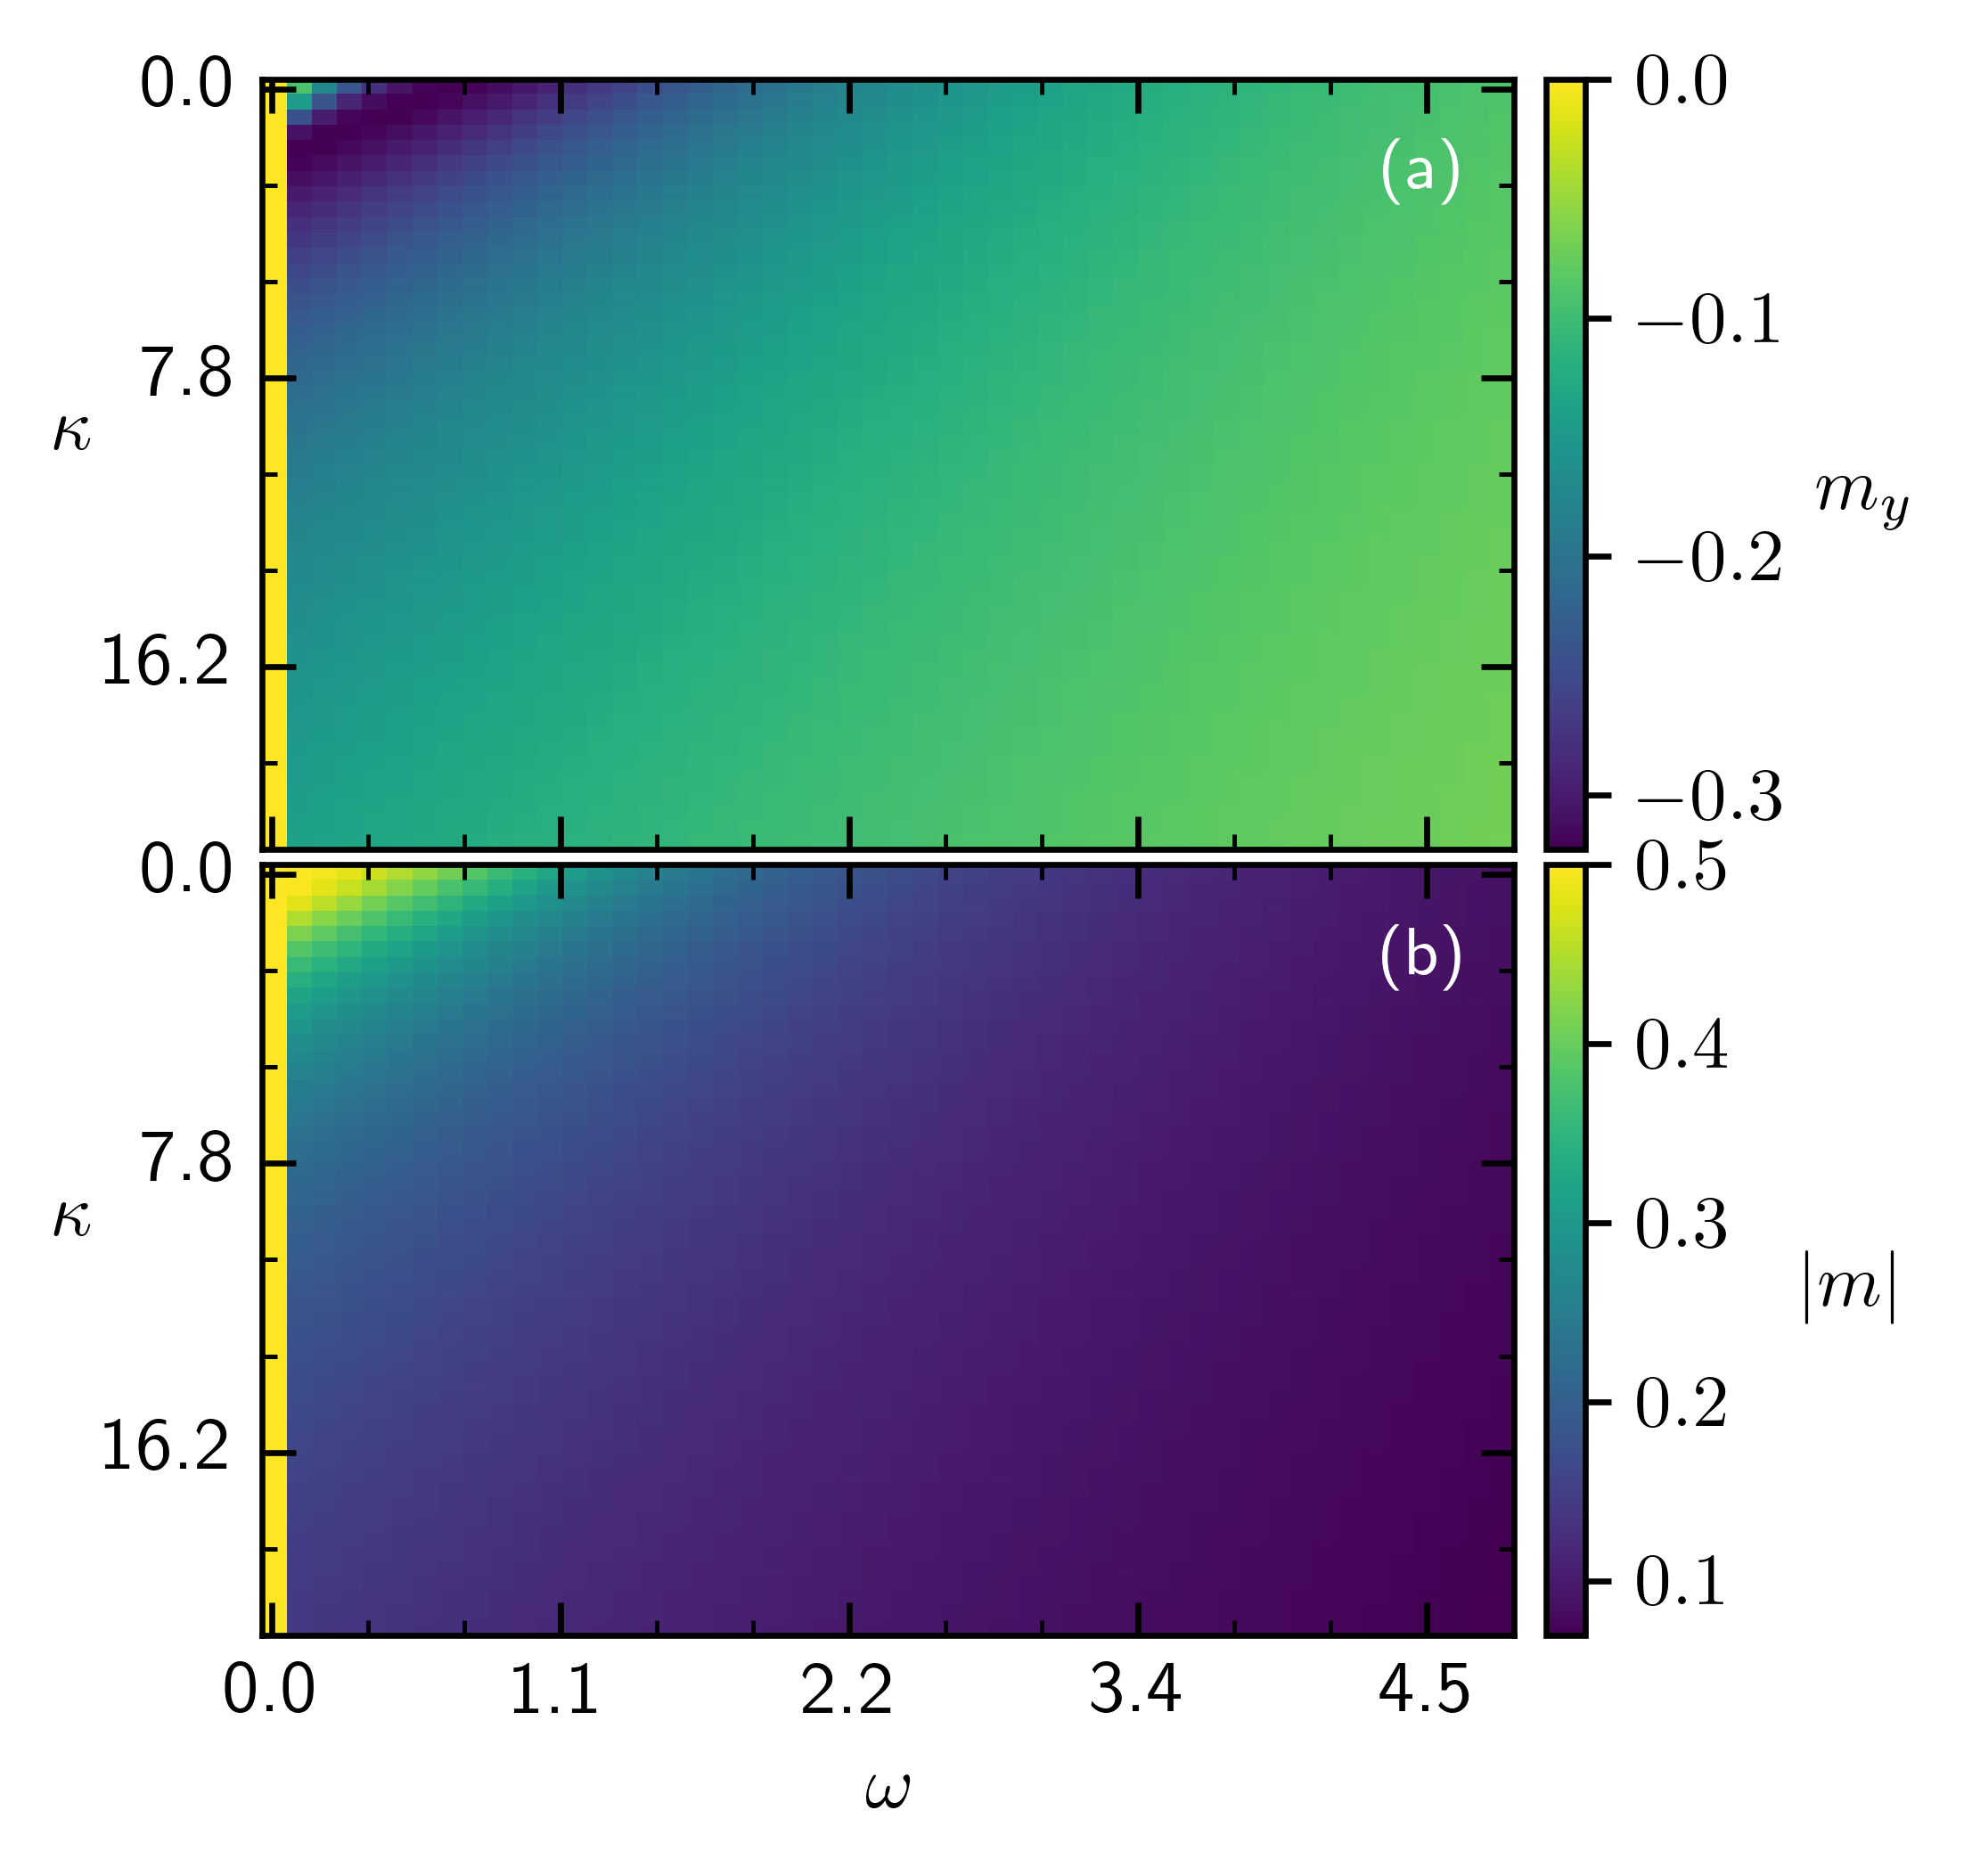

In [158]:
#heatmap fixp boundaries small solution
from matplotlib.colors import LinearSegmentedColormap
p = np.zeros_like(root)
sqrt_interior = np.zeros_like(root)
lamda = np.zeros_like(root)
border = np.zeros_like(root)
shift = 0
zsol_sol = np.zeros_like(root)
for s in range(1):
    for i in range(np.shape(k)[0]):
        for j in range(np.shape(w)[0]):
            
            zsol_sol[i,j,s] = m_z(root[i,j,s],k[i],w[j],Gam) #*w[j]/k[i]

tickformat = Format(xscale=w[shift:],yscale=k,xprec="{:.1f}",yprec="{:.1f}")
tickp = TickProperties(SZX=True,SZY=True,\
                       xtick_step_major=15,\
                        xtick_step_minor=5,\
                            ytick_step_major=15,\
                                ytick_step_minor=5)
setup = Setup_Fig(name_of_plot='fixp_bound_heatmap_s.png',tickp=tickp,formater=tickformat)
setup.fig_width= 10*cm
setup.fig_height=9.6*cm
setup.DEFAULT_HEAT_EXTEND = (-0.5,64.5,39.5,-0.5)
fig, ax = setup.return_fig(shape=(2,1),dots_per_inch=600,xax_share='col',joined=True)
title =[r'(a)',r'(b)']#,r'(c)']# [[r'(a) middle $m_y$-solution',r'(b) middle $m_z$-solution',r'(c) middle $|m|$-solution'],[r'(d) largest $m_y$-solution',r'(e) largest $m_z$-solution',r'(f) largest $|m|$-solution']]
labelpos = ['left','right']
graphs = [root[:,:,0],np.sqrt(zsol_sol[:,shift:,0]**2+root[:,:,0]**2)]
colormap = LinearSegmentedColormap('red',cdict1)
labels = [r'$m_y$',r'$|m|$']
plt.subplots_adjust(hspace=0.02)
for i in range(2):
    # for j in range(2):
        im1 = ax[i].imshow(graphs[i],extent=(-0.5,64.5,39.5,-0.5))
        
        ax[i].set_title(title[i],x=0.93,y=0.8,fontsize=9,color='1')
        
        ax[i].set_ylabel(r'$\kappa$',rotation=0)
        
        images.append(im)
    
        shrink_fac = 1
        padi = 0.02
        cbar1 = fig.colorbar(im1,ax=ax[i],orientation='vertical',shrink=shrink_fac,pad=padi)
        
        labelpads = [10,17]
        cbar1.set_label(labels[i],rotation=0,labelpad=labelpads[i],loc='center')#,
ax[-1].set_xlabel(r'$\omega$')

# fig.tight_layout()
# plt.figtext(s=r'\,\\Figure 5: The figures a-c present the sign of the interior of the square root for the eigenvalues $\lambda_{23}$ \\for the different fixed points and parameter configurations. Figures d-f show in the same manner \\the sign of $p$. In the entire setup is \\$\Gamma=1$ and $\gamma=0.2$ fixed.',x=0,y=0,fontsize=10,bbox=dict(xy=(0,0),width=5,height=5,boxstyle='Square'))
plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/'+setup.name_of_plot,bbox_inches='tight')
plt.show()



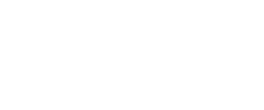

In [163]:
fig,ax = plt.subplots(1,1,figsize=(8*cm,3*cm))
ax.set_axis_off()
plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/blanc.png',bbox_inches='tight')
plt.show()

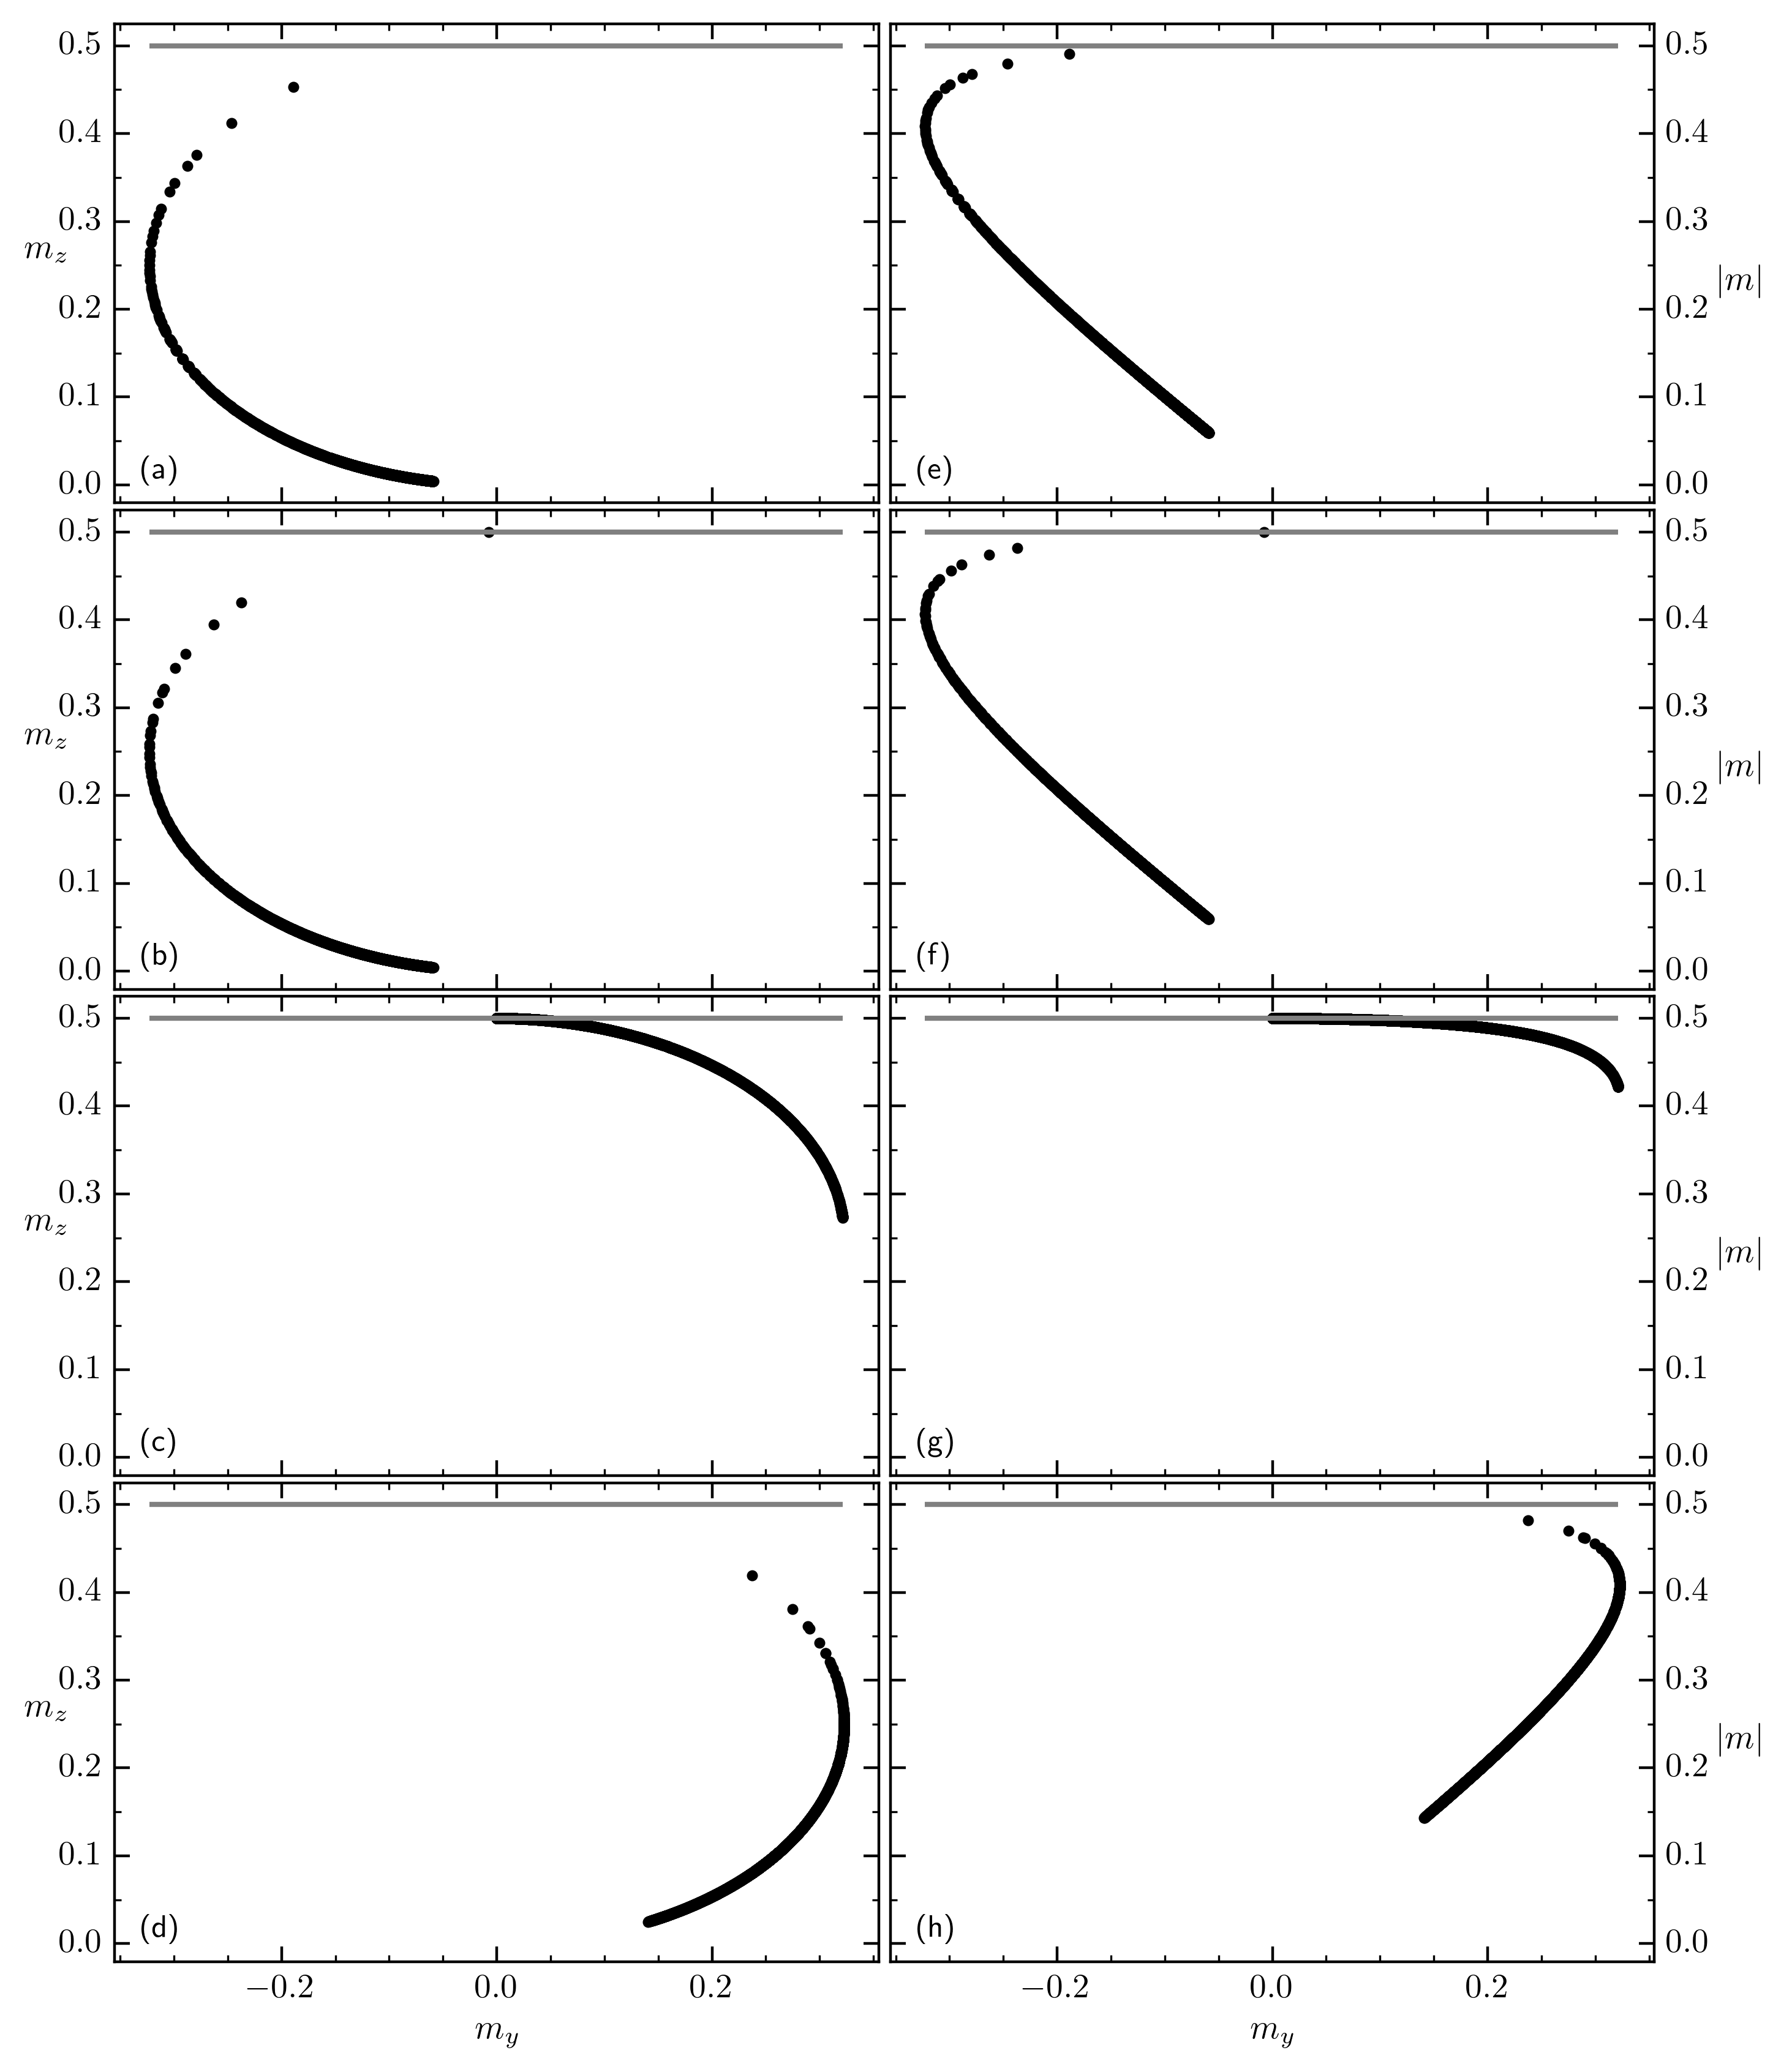

In [80]:
sol1 = []
sol3s = []
sol3m = []
sol3l = []

for i in range(len(k)):#len(k)):
    for j in range(len(w)):
        if i<j:
            sol1.append([root[i,j,0],m_z(root[i,j,0],k[i],w[j],Gam)])
        if i>=j:
            sol3s.append([root[i,j,0],m_z(root[i,j,0],k[i],w[j],Gam)])
            sol3m.append([root[i,j,1],m_z(root[i,j,1],k[i],w[j],Gam)])
            sol3l.append([root[i,j,2],m_z(root[i,j,2],k[i],w[j],Gam)])
        # if i==j:
        #     sol3m.append([root[i,j,2],m_z(root[i,j,2],k[i],w[j],Gam)])
# ticksetup = TickProperties(xtick_step_major=10**7,\
#                            xtick_step_minor=10**6,
#                            )
# phaseplane = Setup_Fig("phaseplane.pdf")
# fig, ax = phaseplane.return_fig(shape=(2,2))
# plotdat = [[sol1,sol3s],[sol3m,sol3l]]
# for i in range(2):
#     for j in range(2):
#         ax[i,j].scatter(plotdat[i][j][:][0],plotdat[i][j][:][1],color='0')
sol1 = np.array(sol1)
sol3s = np.array(sol3s)
sol3m = np.array(sol3m)
sol3l = np.array(sol3l)
sol = [sol1, sol3s, sol3m, sol3l]
col1_label = ['(a)','(b)','(c)','(d)']
col2_label = ['(e)','(f)','(g)','(h)']
tickformat = Format(xscale=w,yscale=k,xprec="{:.1f}",yprec="{:.1f}")
tickp = TickProperties(SZX=False,SZY=False,\
                       xtick_step_major=0.2,\
                        xtick_step_minor=0.05,\
                            ytick_step_major=0.1,\
                                ytick_step_minor=0.05)
boundplot = Setup_Fig('fixp_boundaries.pdf',tickp=tickp,formater=tickformat)
boundplot.fig_width= 20.6*cm
boundplot.fig_height= 26.1*cm
fig, ax = boundplot.return_fig(shape=(4,2),xax_share='col',yax_share='all',joined=True)
for i in range(4):
    ax[i,0].scatter(sol[i][:,0],sol[i][:,1],color='0',s=5)
    ax[i,0].hlines(0.5,min(sol[0][:,0]),max(sol[-2][:,0]),color='0.5')
    # ax[i,0].set_xlabel(r'$m_y')
    ax[i,0].set_ylabel(r'$m_z$',rotation=0,labelpad=4)
    ax[i,0].text(x=-0.33,y=0.008,s=col1_label[i],fontsize=9)
    ax[i,1].scatter(sol[i][:,0],np.sqrt(sol[i][:,0]**2+sol[i][:,1]**2),color='0',s=5)
    ax[i,1].hlines(0.5,min(sol[0][:,0]),max(sol[-2][:,0]),color="0.5")
    ax[i,1].yaxis.set_label_position('right')
    ax[i,1].set_ylabel(r'$|m|$',rotation=0,labelpad=10)
    ax[i,1].text(x=-0.33,y=0.008,s=col2_label[i],fontsize=9)
plt.subplots_adjust(wspace=0.015,hspace=0.015)
ax[i,0].set_xlabel(r'$m_y$')
ax[i,1].set_xlabel(r'$m_y$')
# plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/'+boundplot.name_of_plot,bbox_inches='tight')

plt.show()


In [59]:
sol

[array([[-0.18884215,  0.45273921],
        [-0.24622282,  0.41163104],
        [-0.27918252,  0.37543632],
        ...,
        [-0.05948781,  0.00428325],
        [-0.05904494,  0.00421917],
        [-0.05896429,  0.00420755]]),
 array([[3.72657294e-03, 4.99983335e-01],
        [1.29385829e-06, 5.00000000e-01],
        [1.48125529e-01, 4.72115503e-01],
        ...,
        [3.10046188e-01, 3.19446504e-01],
        [3.14573382e-01, 3.05912007e-01],
        [3.21391502e-01, 2.72901995e-01]]),
 array([[3.72657294e-03, 4.99983335e-01],
        [1.29385829e-06, 5.00000000e-01],
        [1.48125529e-01, 4.72115503e-01],
        ...,
        [3.10046188e-01, 3.19446504e-01],
        [3.14573382e-01, 3.05912007e-01],
        [3.21391502e-01, 2.72901995e-01]]),
 array([[       nan,        nan],
        [0.23729133, 0.41945706],
        [       nan,        nan],
        ...,
        [0.32128636, 0.22622932],
        [0.32248137, 0.23982855],
        [       nan,        nan]])]

In [10]:
omg = 2
kap = 1
Gamma = np.linspace(1/10**4,0.3,30)

m = np.zeros((Gamma.shape[0],2))

for i in range(len(Gamma)):
    r = root_scalar(Foriginal,args=(omg,kap,Gamma[i],sgam),bracket=(minF(omg,kap,Gamma[i],sgam),maxF(omg,kap,Gamma[i],sgam)))
    m[i,:] = r.root, m_z(r.root,kap,omg,Gamma[i])

plt.figure()
plt.plot(Gamma,m[:,0])
plt.show()


ValueError: f(a) and f(b) must have different signs

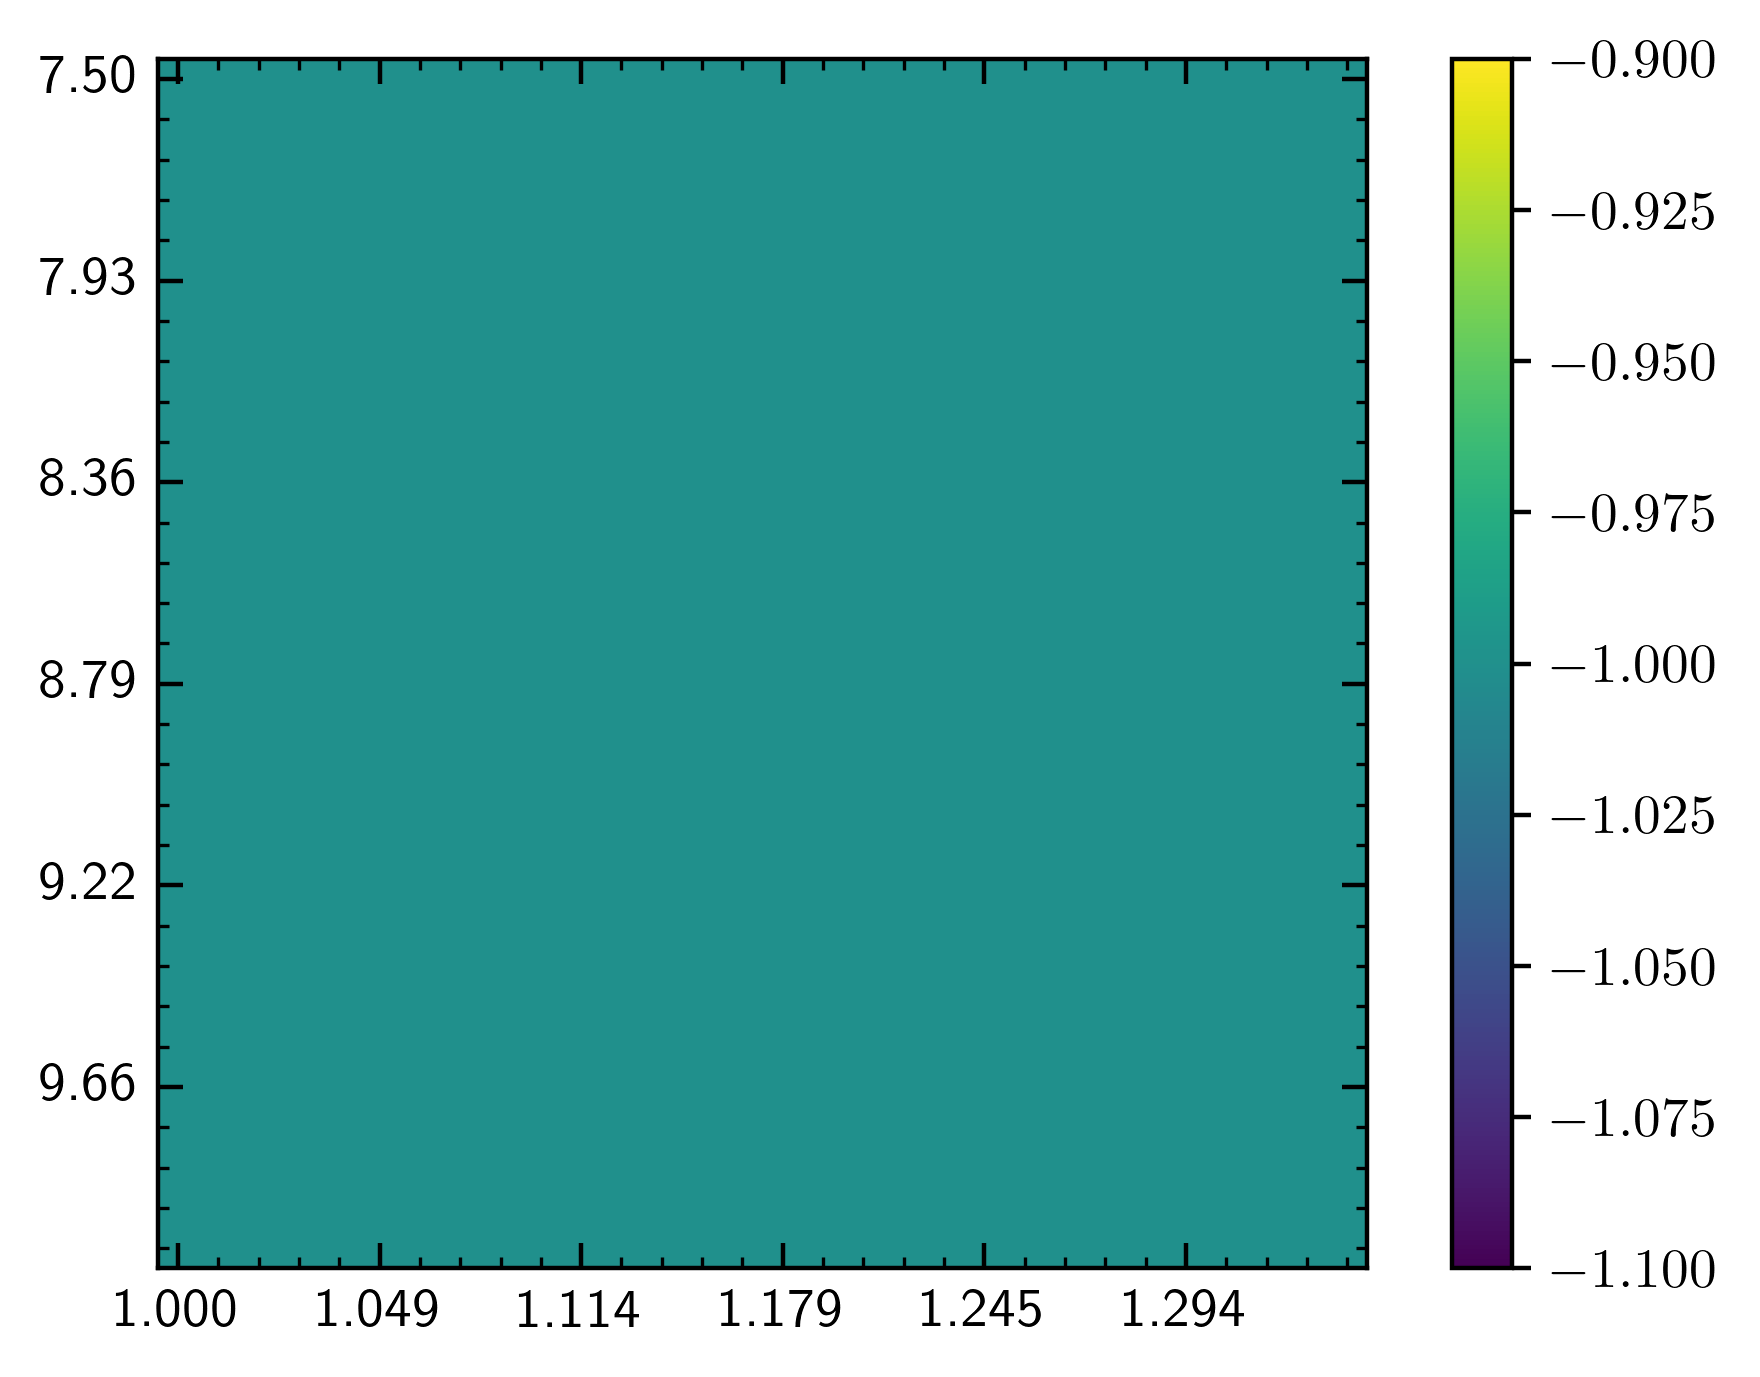

In [8]:
cm = 1/2.54  
width = 12*cm 
name_of_plot = "sign_of_ev1.pdf"
major_xtick_step = 5
minor_xtick_step = 1
major_ytick_step = 5
minor_ytick_step = 1
STRIP_OF_ZEROS_X = True
STRIP_OF_ZEROS_Y = True
                                                                              
fig, ax = plt.subplots(1,1,figsize=(width,4.8/6.4*width),dpi=400)

# ax.scatter(A,root,color='0')




# axlimits have to be adapted
# ax.set_xlim(A[0],A[-1])
# ax.set_ylim(-2.5,3.5)

# legend has to be adapted
# plt.legend([r'$r_{\lambda_1}^{max}$',r'$\tilde{y}_{max}$',r'$r_{\lambda_1}^{min}$'],loc='center left',bbox_to_anchor=(0.01,0.38))
# plt.legend([r'$r$',r'$r$',r'$y_{max}$'],loc='center left',bbox_to_anchor=(0.2,0.5))

plt.rcParams["lines.markersize"]=0.7
plt.rcParams["axes.unicode_minus"]=True
plt.rcParams["font.size"]=10
plt.rcParams["text.usetex"]=True
plt.rcParams["font.serif"]="Computer Modern Serif"
# def strip0(x,pos):
#     if x<0: 
#         return u'\u2212'+ str(x).rstrip(".0").lstrip("-")
#     else:
#         if str(x).rstrip(".0"):
#             return str(x).rstrip(".0")
#     return "0"
# im.set_extent((-0.5,39.5,29.5,-0.5))
trash, xw, yw, trash=(-0.5,39.5,29.5,-0.5)# im.get_extent()
numb_xticks = xw//major_xtick_step+1
numb_yticks = yw//major_ytick_step+1
def formatx0(x,pos):
    try:
            # print(x,pos)#,"{:.2f}".format(w[int(x)]))
           
        index = int((pos-1)*w.shape[0]//numb_xticks)
           # print(index)
           # print()
        return "{:.2f}".format(W[index])
    except:
        return "{:.2f}".format(W[-1])
def formatx1(x,pos):
    try:
            # print(x,pos)#,"{:.2f}".format(w[int(x)]))

        index = int((pos-1)*W.shape[0]//numb_xticks)
           # print(index)
           # print()
        return "{:.3f}".format(W[index])
    except:
        return "{:.1f}".format(W[-1])
    
def formaty(x,pos):
    try:
        return "{:.2f}".format(K[int(x)])
    except:
        return ""

if STRIP_OF_ZEROS_X:
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatx1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(major_ytick_step))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(minor_ytick_step))
ax.xaxis.set_major_locator(ticker.MultipleLocator(major_xtick_step))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(minor_xtick_step))

if STRIP_OF_ZEROS_Y:
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(formaty))  

  
ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
ax.tick_params(axis='both',which='major',length=4.5)
ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)
# ax.set_xlabel(r'$\Gamma \tilde{A}$')
# ax.set_ylabel(r'$\tilde{y}$',rotation=0)
plt.setp(ax.yaxis.get_majorticklabels(),va='center')

im = ax.imshow(np.sign(damp))
cbar = ax.figure.colorbar(im,ax=ax)
fig.tight_layout()
plt.show()

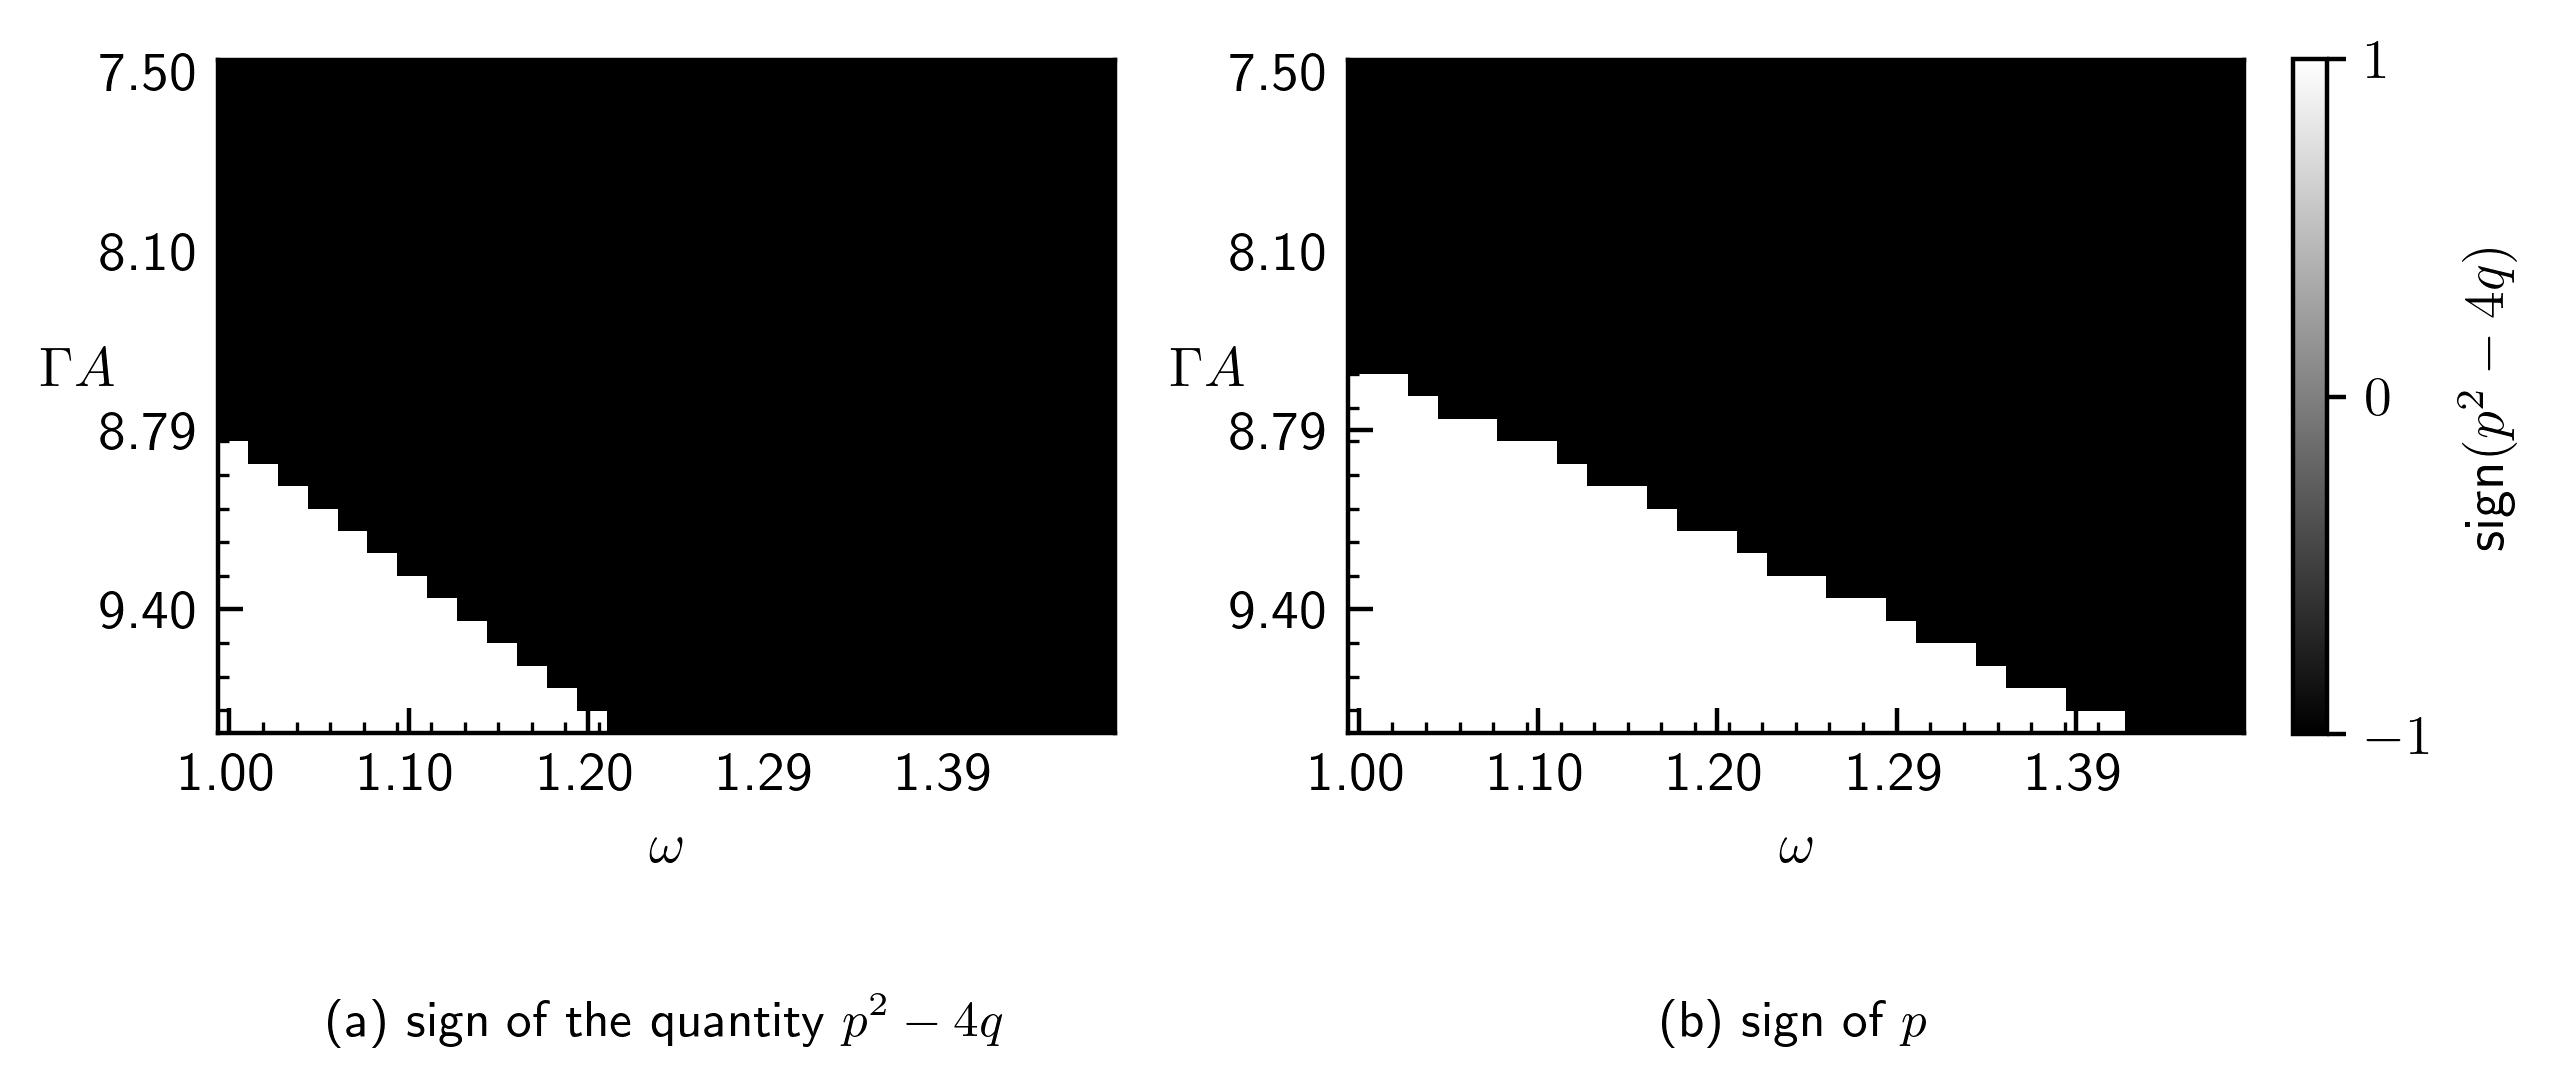

In [6]:
cm = 1/2.54  
width = 10*cm 
name_of_plot = "oszi_of_ev2_fix1.pdf"
title = [r'(a) sign of the quantity $p^2-4q$',r'(b) sign of $p$']
plt.rcParams["lines.markersize"]=0.7
plt.rcParams["axes.unicode_minus"]=True
plt.rcParams["font.size"]=10
plt.rcParams["text.usetex"]=True
plt.rcParams["font.serif"]="Computer Modern Serif"
# lam = lamda
lamda = np.stack((lam,damp),axis=2)
nplots =2   
fig, ax = plt.subplots(1,nplots,figsize=(2*width,4.8/6.4*width),dpi=400)
images = []
# ax[n].scatter(A,root,color='0')
for n in range(nplots):



# axlimits have to be adapted
# ax[n].set_xlim(A[0],A[-1])
# ax[n].set_ylim(-2.5,3.5)

# legend has to be adapted
# plt.legend([r'$r_{\lambda_1}^{max}$',r'$\tilde{y}_{max}$',r'$r_{\lambda_1}^{min}$'],loc='center left',bbox_to_anchor=(0.01,0.38))
# plt.legend([r'$r$',r'$r$',r'$y_{max}$'],loc='center left',bbox_to_anchor=(0.2,0.5))

    major_xtick_step = 8
    minor_xtick_step = 1.5
    major_ytick_step = 8
    minor_ytick_step = 1.5
    STRIP_OF_ZEROS_X = True
    STRIP_OF_ZEROS_Y = True


    # def strip0(x,pos):
    #     if x<0: 
    #         return u'\u2212'+ str(x).rstrip(".0").lstrip("-")
    #     else:
    #         if str(x).rstrip(".0"):
    #             return str(x).rstrip(".0")
    #     return "0"
    im = ax[n].imshow(np.sign(lamda[:,:,n]),cmap='gray')
    im.set_extent((-0.5,39.5,29.5,-0.5))
    trash, xw, yw, trash= im.get_extent()
    numb_xticks = xw//major_xtick_step+1
    numb_yticks = yw//major_ytick_step+1
    def formatx0(x,pos):
        try:

            # print(x,pos)#,"{:.2f}".format(w[int(x)]))
            
            index = int((pos-1)*W.shape[0]//numb_xticks)
            # print(index)
            # print()
            return "{:.2f}".format(W[index])
        except:
            return "{:.2f}".format(W[-1])
    def formatx1(x,pos):
        try:

            # print(x,pos)#,"{:.2f}".format(w[int(x)]))
            
            index = int((pos-1)*W.shape[0]//numb_xticks)
            # print(index)
            # print()
            return "{:.2f}".format(W[index])
        except:
            return "{:.2f}".format(W[-1])
    def formaty0(x,pos):
        try:
            index = int((pos-1)*K.shape[0]//numb_yticks)
            return "{:.2f}".format(K[index])
        except:
            return "{:.2f}".format(K[-1])
    def formaty1(x,pos):
        try:
            index = int((pos-1)*K.shape[0]//numb_yticks)
            return "{:.2f}".format(K[index])
        except:
            return "{:.2f}".format(K[-1])
    
    ax[n].yaxis.set_major_locator(ticker.MultipleLocator(major_ytick_step))
    ax[n].yaxis.set_minor_locator(ticker.MultipleLocator(minor_ytick_step))
    ax[n].xaxis.set_major_locator(ticker.MultipleLocator(major_xtick_step))
    ax[n].xaxis.set_minor_locator(ticker.MultipleLocator(minor_xtick_step))
    if STRIP_OF_ZEROS_X:
        if n==0:
            ax[n].xaxis.set_major_formatter(ticker.FuncFormatter(formatx0))
        else:
            ax[n].xaxis.set_major_formatter(ticker.FuncFormatter(formatx1))
    if STRIP_OF_ZEROS_Y:
        if n==0:
            ax[n].yaxis.set_major_formatter(ticker.FuncFormatter(formaty0))
        else:
            ax[n].yaxis.set_major_formatter(ticker.FuncFormatter(formaty1))
    ax[n].tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
    ax[n].tick_params(axis='both',which='major',length=4.5)
    ax[n].tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)
    ax[n].set_ylabel(r'$\Gamma A$',rotation=0)
    ax[n].set_xlabel(r'$$\omega$$',rotation=0)
    ax[n].set_title(title[n],loc='center',y=-0.5,fontsize=9)

plt.subplots_adjust(wspace=0.26)

# ax.set_xticks(np.arange(len(w)),w)
# ax.set_yticks(np.arange(len(A)),A)
cbar = ax[1].figure.colorbar(im,ax=ax,ticks=ticker.MultipleLocator(1),label=r'sign$(p^2-4q)$',pad=0.02,shrink=0.743)
# ax.figure.set_size_inches(width,4.8/6.4*width)
# fig.set_size_inches(width,4.8/6.4*width)


# fig.tight_layout()
# plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/'+name_of_plot,bbox_inches='tight')

plt.show()


In [10]:
indi = []
for i in range(lamda.shape[0]):
    for j in range(lamda.shape[1]):
        if lamda[i,j,0]*lamda[i,j,1]<0:
            indi.append([W[j],K[i]])
indi = np.array(indi)
i1=0
i2=-1
W0 , K0 , slope = indi[0,0], indi[0,1], (indi[i2,1]-indi[i1,1])/(indi[i2,0]-indi[i1,0])

      converged: True
           flag: converged
 function_calls: 9
     iterations: 8
           root: 0.1446161325938055
[[  82.7468014 ]
 [-164.57734194]
 [-192.02899422]]


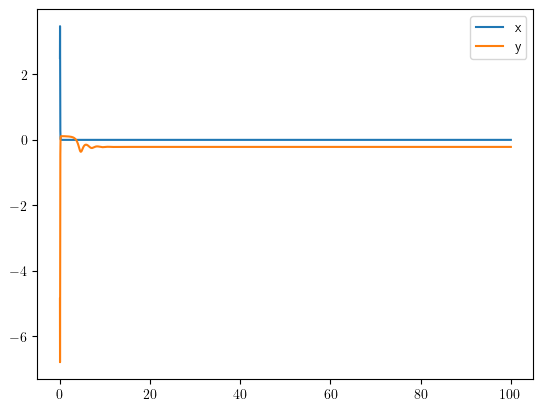

      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 0.1487662861548717
[[  84.333715  ]
 [-167.72159785]
 [-195.466853  ]]


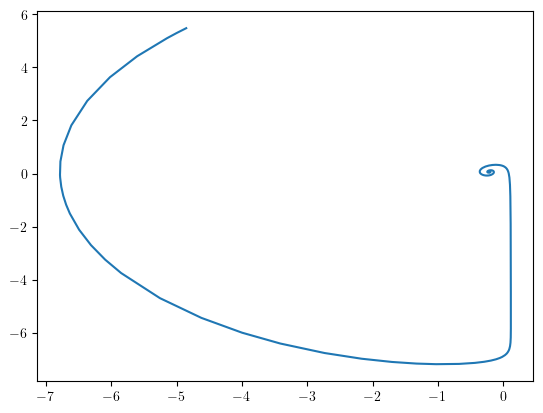

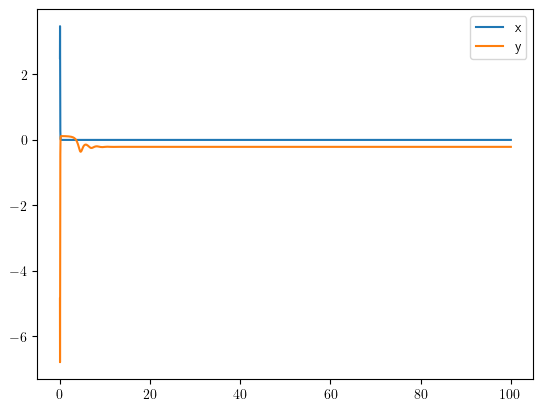

      converged: True
           flag: converged
 function_calls: 9
     iterations: 8
           root: 0.1527318819968104
[[  85.91994486]
 [-170.86549412]
 [-198.90672745]]


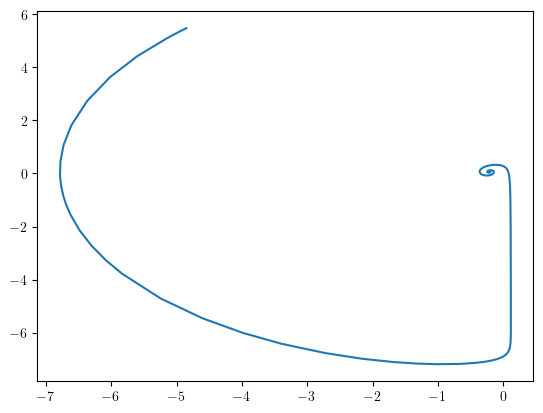

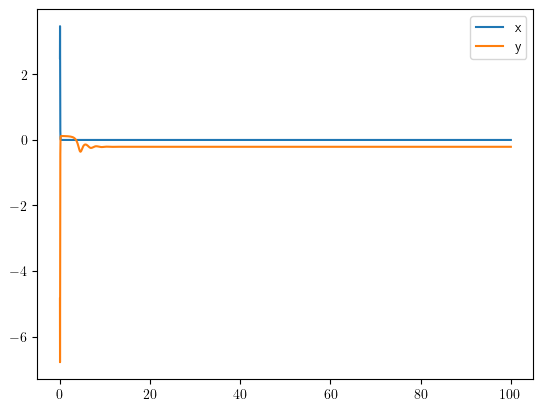

      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 0.15652476350211172
[[  87.50552831]
 [-174.00904613]
 [-202.34849906]]


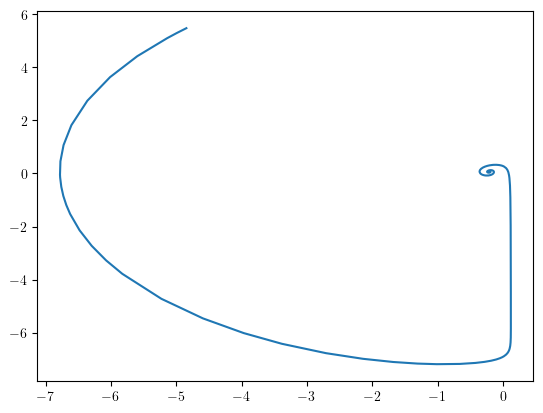

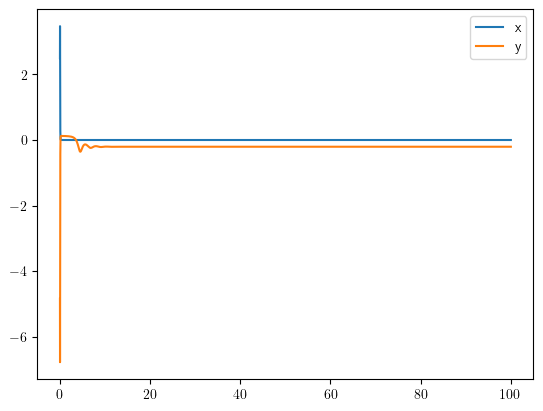

      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 0.160155779695631
[[  89.09049959]
 [-177.15226817]
 [-205.79205937]]


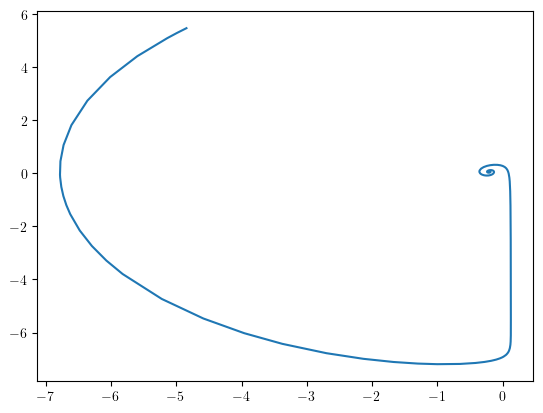

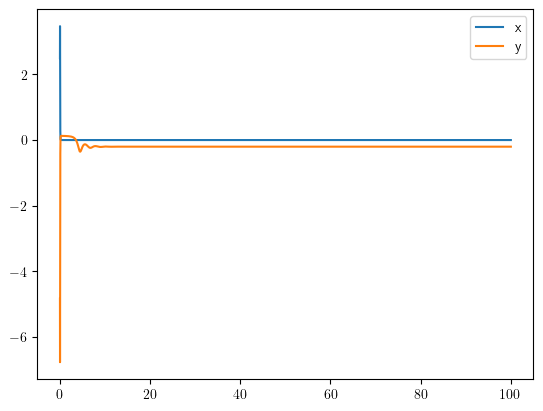

      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 0.16363488871973078
[[  90.67489021]
 [-180.29517347]
 [-209.23730889]]


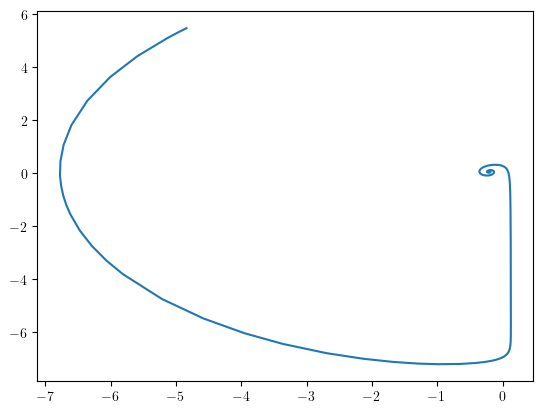

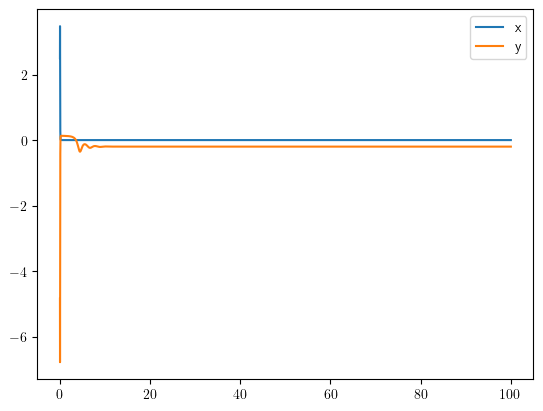

      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 0.1669712484158406
[[  92.2587292 ]
 [-183.43777439]
 [-212.68415613]]


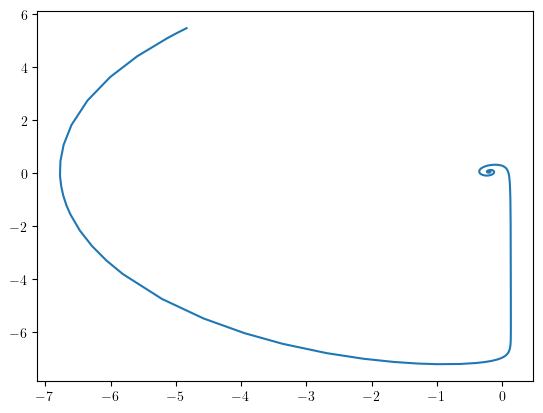

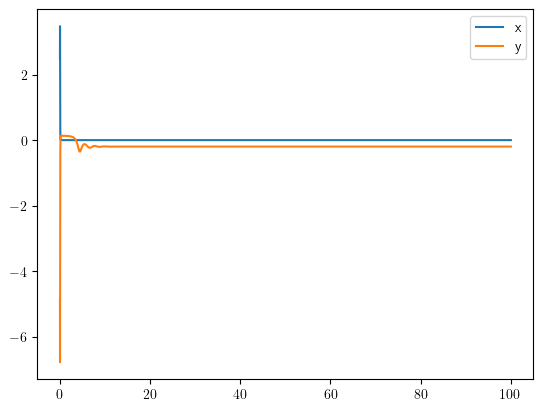

      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 0.1701732958899212
[[  93.84204342]
 [-186.58008244]
 [-216.13251671]]


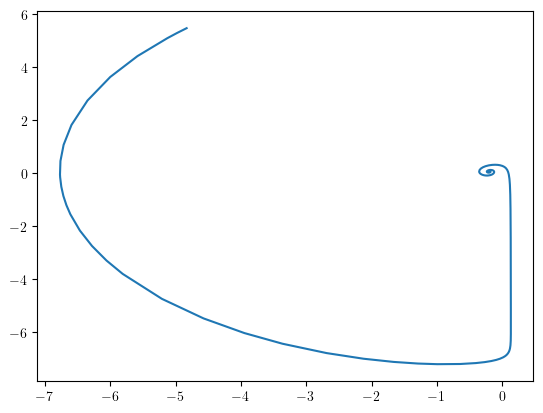

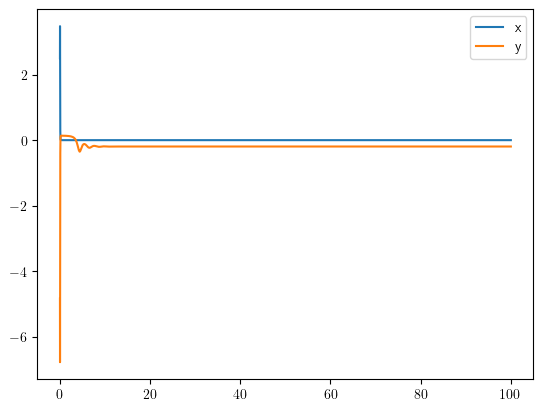

      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 0.17324881762577682
[[  95.42485774]
 [-189.72210838]
 [-219.58231271]]


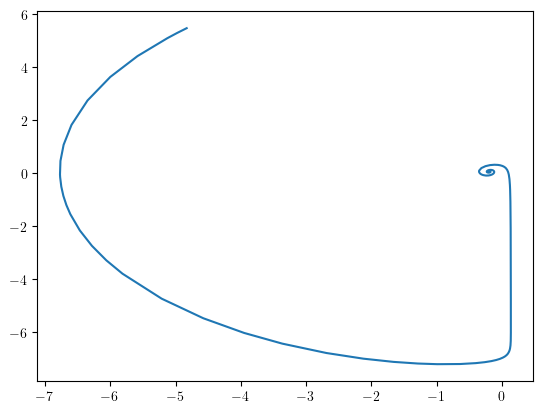

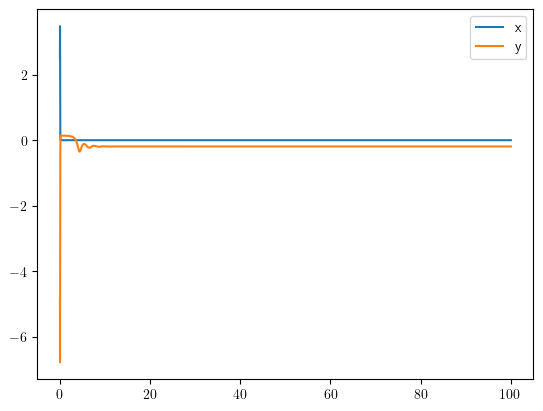

      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 0.1762050114557394
[[  97.00719524]
 [-192.86386232]
 [-223.03347196]]


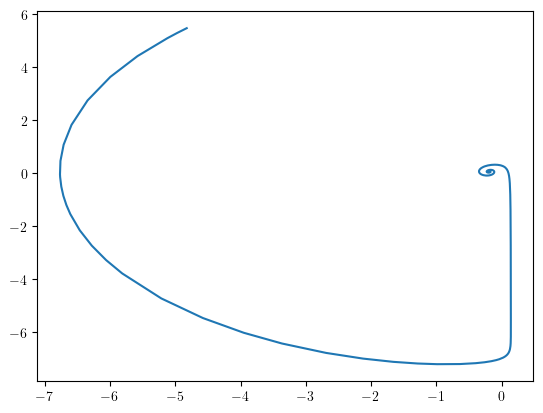

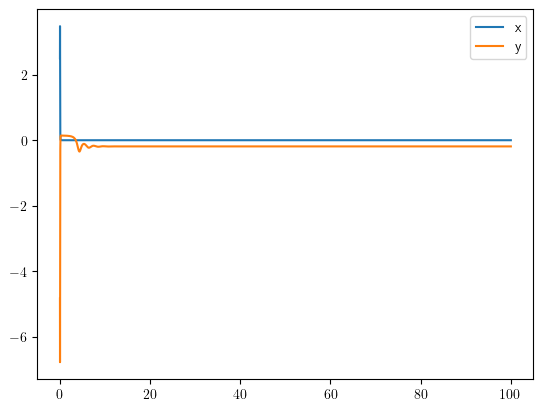

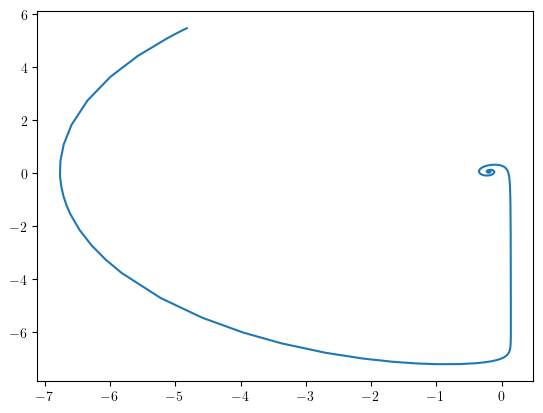

In [ ]:
W_oszi = np.linspace(1,(K[0]-2.3)/3.53,10)
K_oszi = K0-W0*slope+slope*W_oszi
from sympy.abc import gamma, G, kappa, omega, x, y, z, t
from sympy.matrices import Matrix
from sympy import lambdify
import numpy as np
m = Matrix([x,y,z])
glx = -(gamma+G)/2*m[0]+kappa*m[0]*m[2]/np.sqrt(2)
gly = -omega*m[2]/np.sqrt(2)-(gamma+G)/2*m[1]+kappa*m[1]*m[2]/np.sqrt(2)
glz = omega*m[1]/np.sqrt(2)-kappa*(m[0]**2+m[1]**2)/np.sqrt(2)+G/2-G*m[2]
gl = Matrix([glx,gly,glz])
jac_gl = gl.jacobian([x,y,z])
gl_np = lambdify([t,m,omega,kappa,G,gamma],gl)
jac_gl_np = lambdify([t,m,omega,kappa,G,gamma],jac_gl)
gl_np(0,[0,2,1],1,1/2,0.2,1), jac_gl_np(0,[0,2,1],1,1/2,0.2,1)
from scipy.integrate import solve_ivp



for index in range(len(W_oszi)):
    arguments = [W_oszi[index],K_oszi[index],Gam,sgam]
    def F(y,omega,k,G,gamma):
        return -omega*G/np.sqrt(2)/k**2-(G*(G+gamma-k/np.sqrt(2))/k**2+omega**2/k**2)*y-y**3+2*omega/k*y**2
    r = root_scalar(F,args=(W_oszi[index],K_oszi[index],Gam,sgam),method='brentq',bracket=(minF(W_oszi[index],K_oszi[index])*W_oszi[index]/K_oszi[index],maxF(W_oszi[index],K_oszi[index])*W_oszi[index]/K_oszi[index]))
    print(r)
    msol2= np.array([0,r.root,m_z(0,r.root,W_oszi[index],K_oszi[index],Gam)])+5*np.array([0.5,-1,1])
    print(gl_np(0,msol2,W_oszi[index],K_oszi[index],Gam,sgam))
    traj = solve_ivp(gl_np,(0,100),msol2,'LSODA',args=arguments)
    plt.figure()
    plt.plot(traj.t,traj.y[0])
    plt.plot(traj.t,traj.y[1])
    # plt.plot(traj.t,traj.y[2])
    plt.legend(['x','y','z'])
    plt.show()
    plt.figure()
    plt.plot(traj.y[1],traj.y[2]) 

-6.794123601355784e-07 8980500268.606827
-7.179442501059619e-07 12530995037.981106
-7.582211202228351e-07 15520866661.043312
-8.006873869342845e-07 17958512559.186394
-8.457746326490101e-07 19881004112.305584
-8.939343948966005e-07 21332885062.83916
-9.456622625247935e-07 22358821752.128784
-1.0015198121104962e-06 23001036572.701935
-1.0621579788622215e-06 23298551252.277847
-1.1283445675719372e-06 23287140456.339024
-1.2009986467831357e-06 22999556653.214584
-1.2812352173513508e-06 22465842873.047115
-1.3704248281870557e-06 21713655518.13104
-1.4702749641798407e-06 20768564533.575638
-1.582943557829064e-06 19654317428.30556
-1.7112008171144e-06 18393060742.215725
-1.8586654772223543e-06 17005513125.931822
-2.030158949964389e-06 15511079795.875393
0.10416666666666667


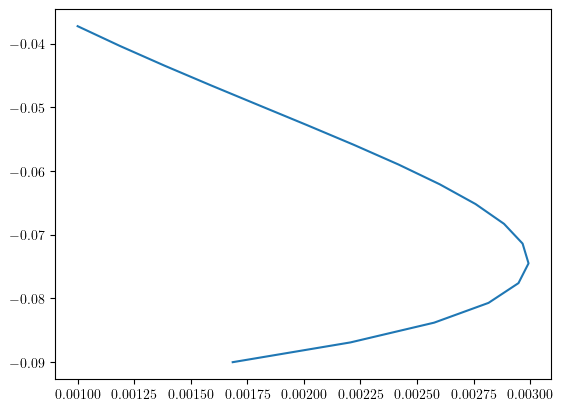

In [39]:
# plt.figure()
# A = np.stack((np.linspace(-1/8,0-1/1000,100),np.linspace(-1/8,0,100)),axis=1)
# k_test = np.zeros_like(A[:,0])
# G = np.linspace(0.2,1.3,5)
# l = G.shape[0]
# for j in range(l):
#     Gam = G[j]
#     sgam = 0.2*Gam
#     for i in range(A.shape[0]//2):
#         k_test[i]= kappa_np(A[i,0],Gam,sgam,-1)
#     plt.plot(A[:,0],np.sqrt(-k_test**2*A[:,0]/2))
   
# for Gam in G:
#     plt.hlines(Gam,A[0,0],A[-1,0])
# plt.legend(['1','2','3','4','5'])
# plt.show()
x = np.linspace(0,200)
Gam =0.7
sgam = 0.2*Gam
def w_inv(x,a,Gamma,gamma):
    k = kappa_np(a,Gamma,gamma,-1)
    s2= np.sqrt(2)
    return -2/27-(2*gamma+k/s2)/3*Gamma*x**2+2/27*(1-3*(2*Gamma**2/k**2+a)*x**2)**(3/2)
A = np.linspace(-0.09,0-1/10**5,30)[:18]
root = np.zeros_like(A)
for i in range(A.shape[0]):
    a= A[i]
    # print(kappa_np(a,Gam,sgam,-1))
    # print(2*Gam**2/kappa_np(a,Gam,sgam,-1)**2+a)
    print(w_inv(0.001,a,Gam,sgam),w_inv(20000,a,Gam,sgam))
    r = root_scalar(w_inv,args=(a,Gam,sgam),method='brentq',bracket=(0.001,20000))
    root[i] = r.root
print(1/8/(1+sgam/Gam))
plt.figure()
plt.plot(1/root,A)
# plt.plot(x,w_inv(x,A[0],))
plt.show()



